In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm_notebook
import datetime
# from bokeh.io import output_notebook, show
# from bokeh.plotting import figure
# output_notebook();

from numba import jit
from joblib import Parallel, delayed

from scipy.signal import hann
from scipy.signal import hilbert
from scipy.signal import convolve
from scipy import stats
from scipy import signal
from scipy import fftpack 
from scipy.signal import butter, deconvolve
from scipy.stats import kurtosis, skew
from scipy import optimize


import lightgbm as lgb

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [2]:
PATH="./input/"
train_df = pd.read_csv((PATH + 'train.csv'), dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32})

In [3]:
train = train_df
SIGNAL_LEN = 150000
SAMPLE_RATE = 4000
acoustic_data = train.acoustic_data
time_to_failure = train.time_to_failure
data_len = len(train)
del train
gc.collect()

signals = []
targets = []

for i in range(data_len//SIGNAL_LEN):
    min_lim = SIGNAL_LEN * i
    max_lim = min([SIGNAL_LEN * (i + 1), data_len])
    
    signals.append(list(acoustic_data[min_lim : max_lim]))
    targets.append(time_to_failure[max_lim])
    
del acoustic_data
del time_to_failure
gc.collect()
    
signals = np.array(signals)
targets = np.array(targets)

In [4]:
signals[0]

array([12,  6,  8, ...,  6,  2,  0])

In [5]:
submission = pd.read_csv("./input/sample_submission.csv")

seg_gen = {seg_id:np.array(pd.read_csv('./input/test/' + seg_id + '.csv').acoustic_data) for seg_id in submission.seg_id}
# df = pd.DataFrame(index=range(2624))

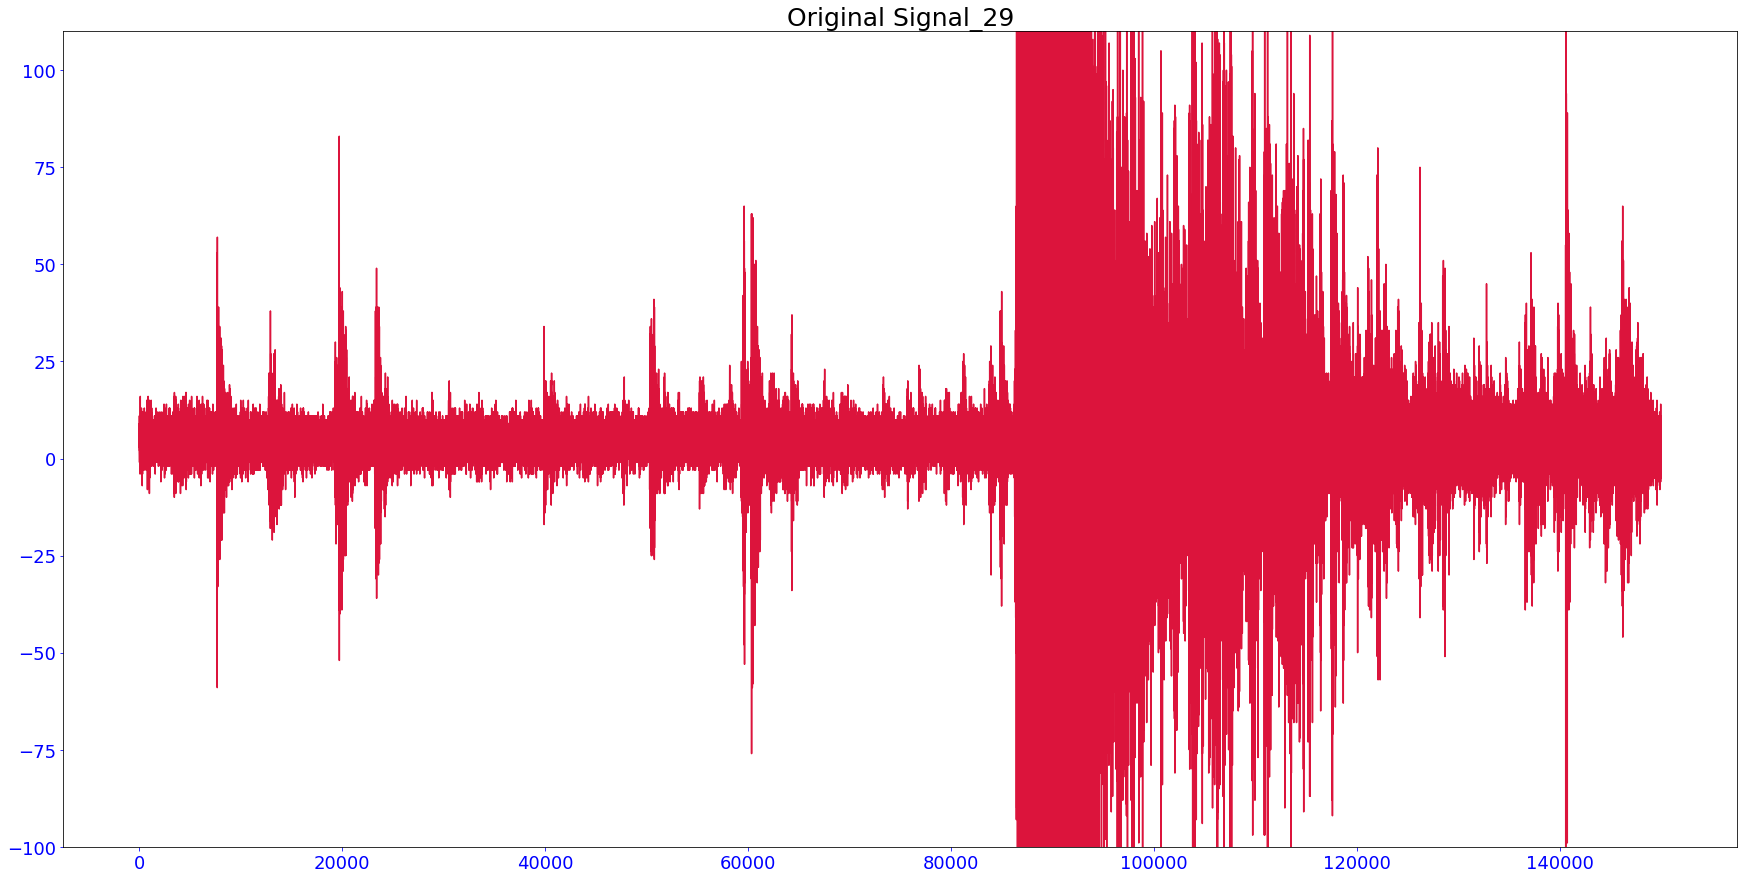

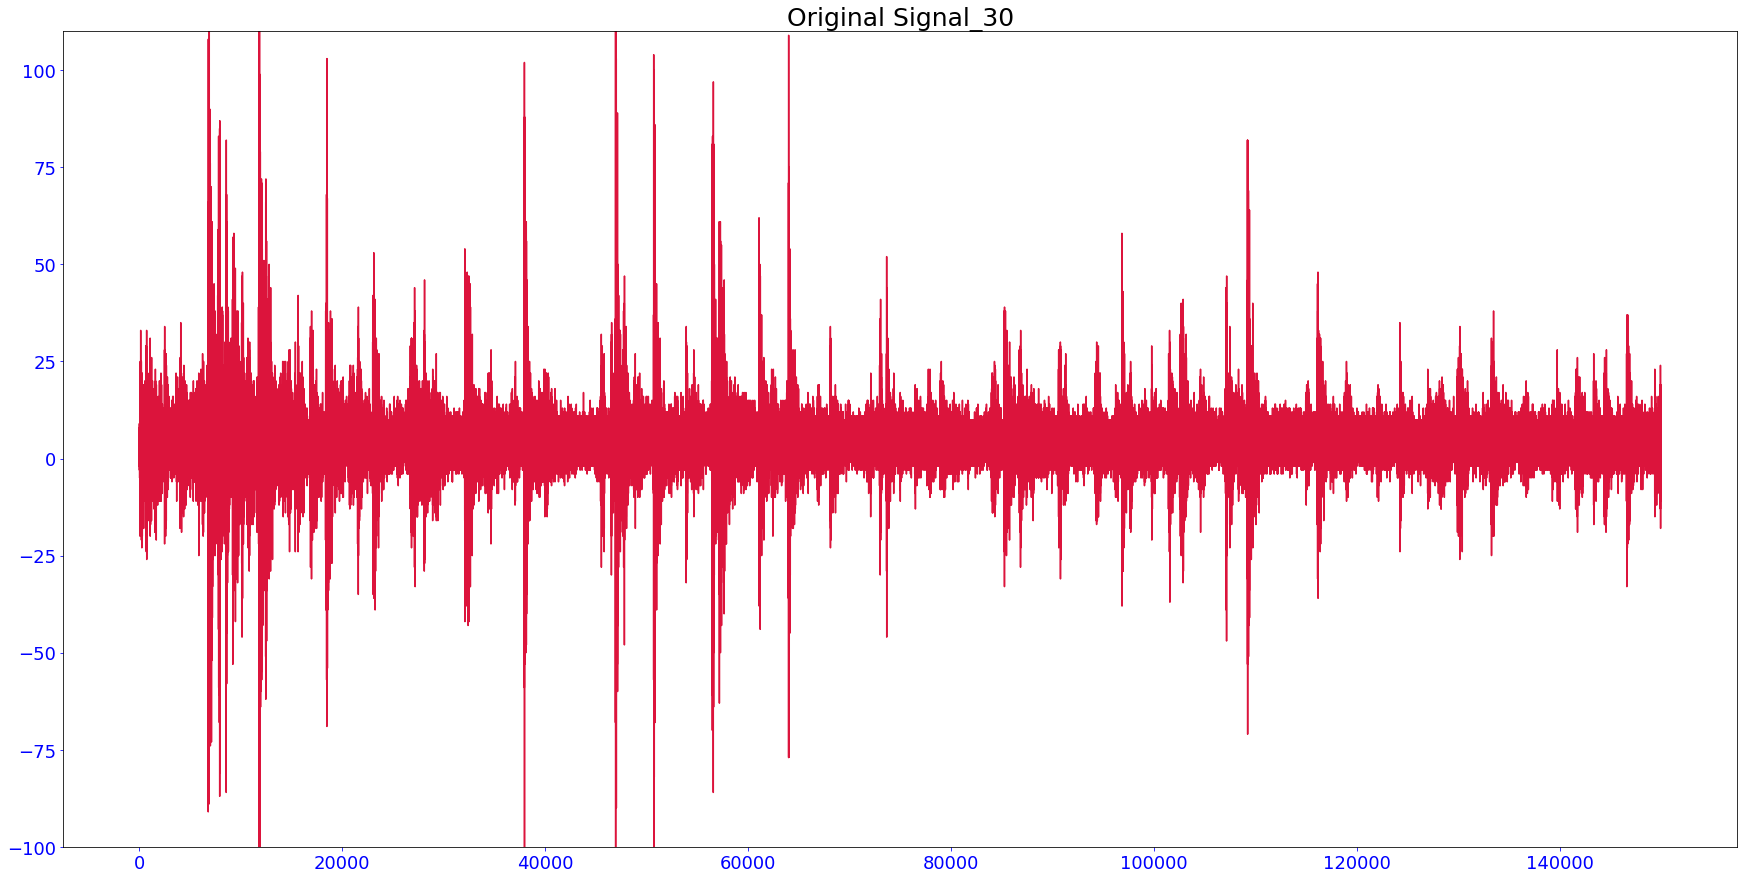

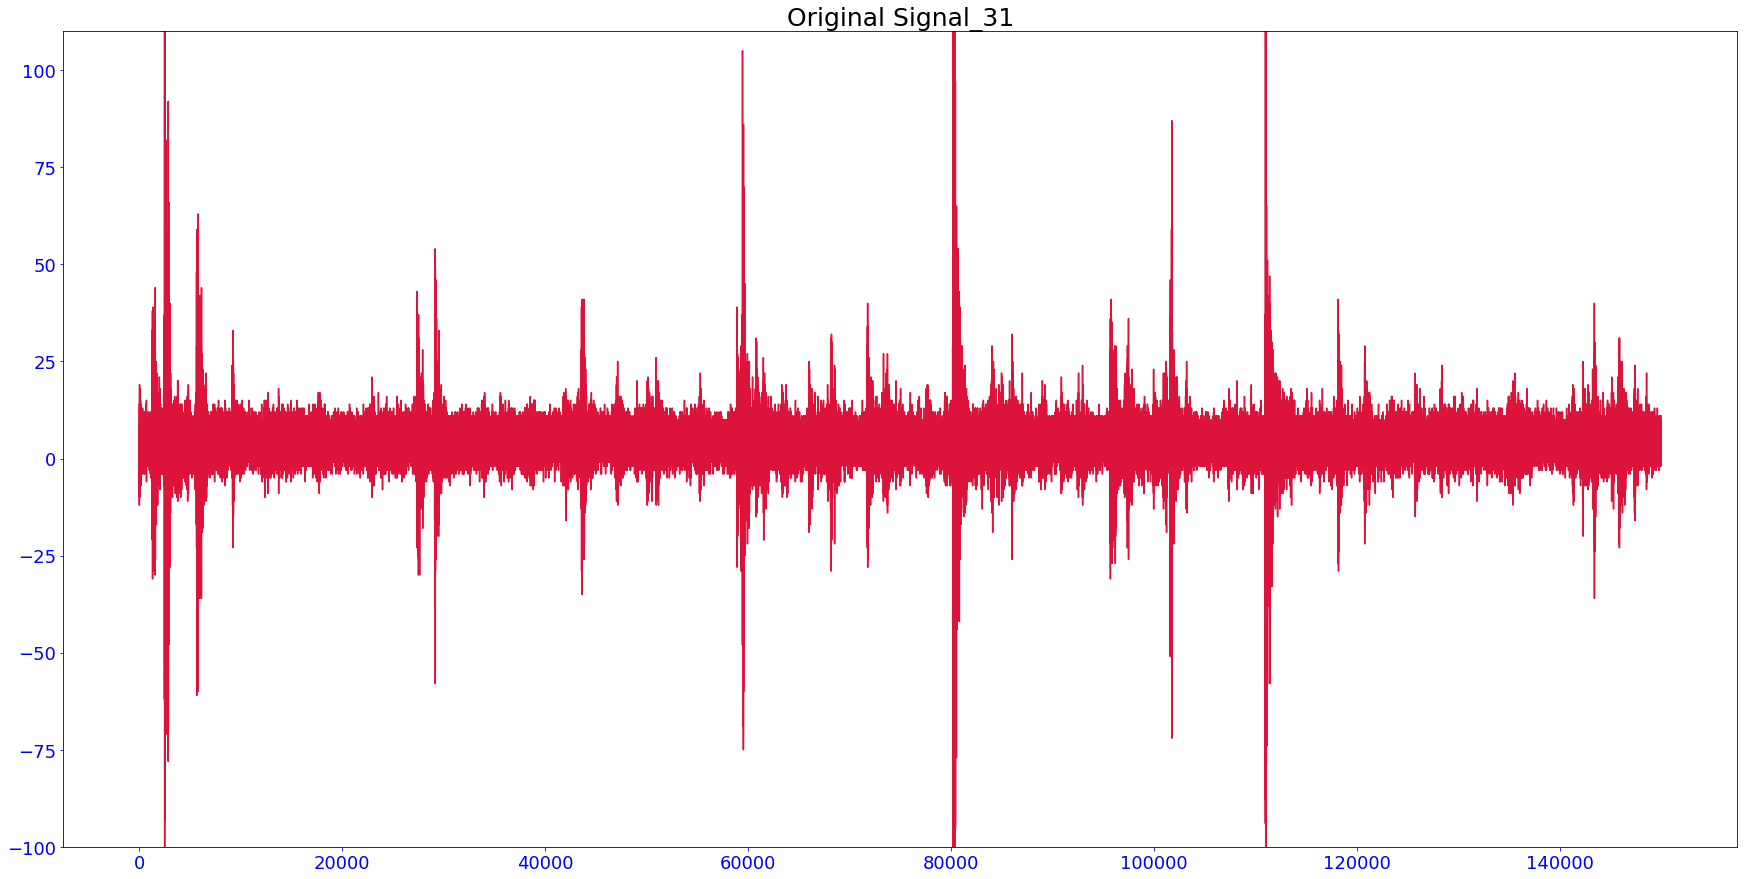

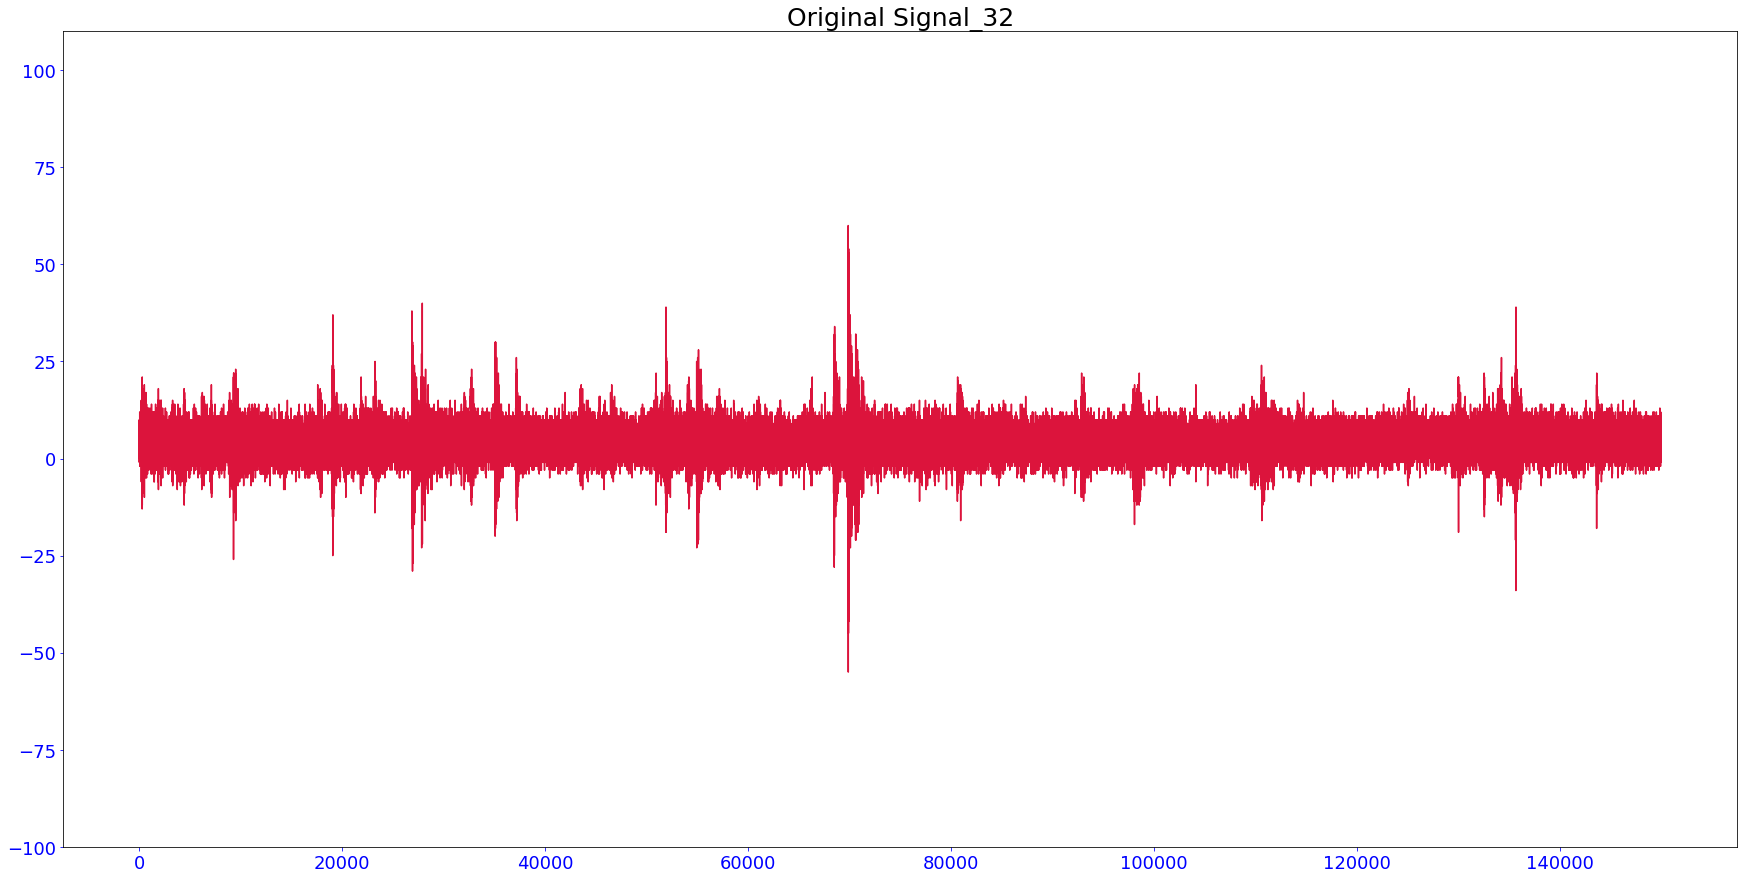

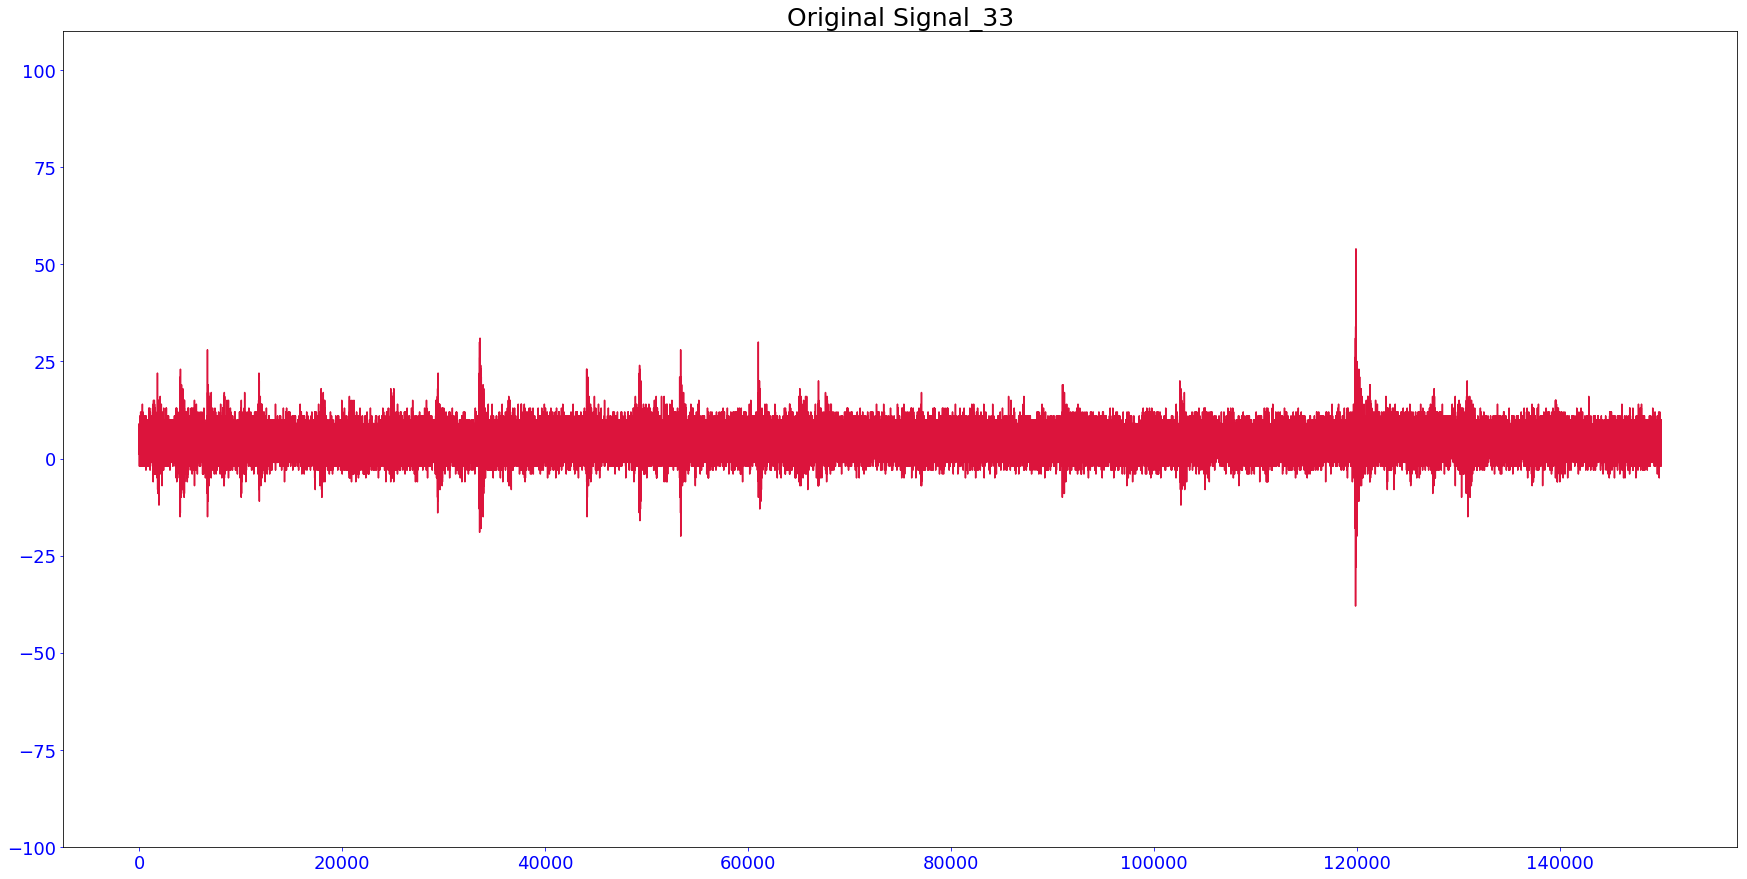

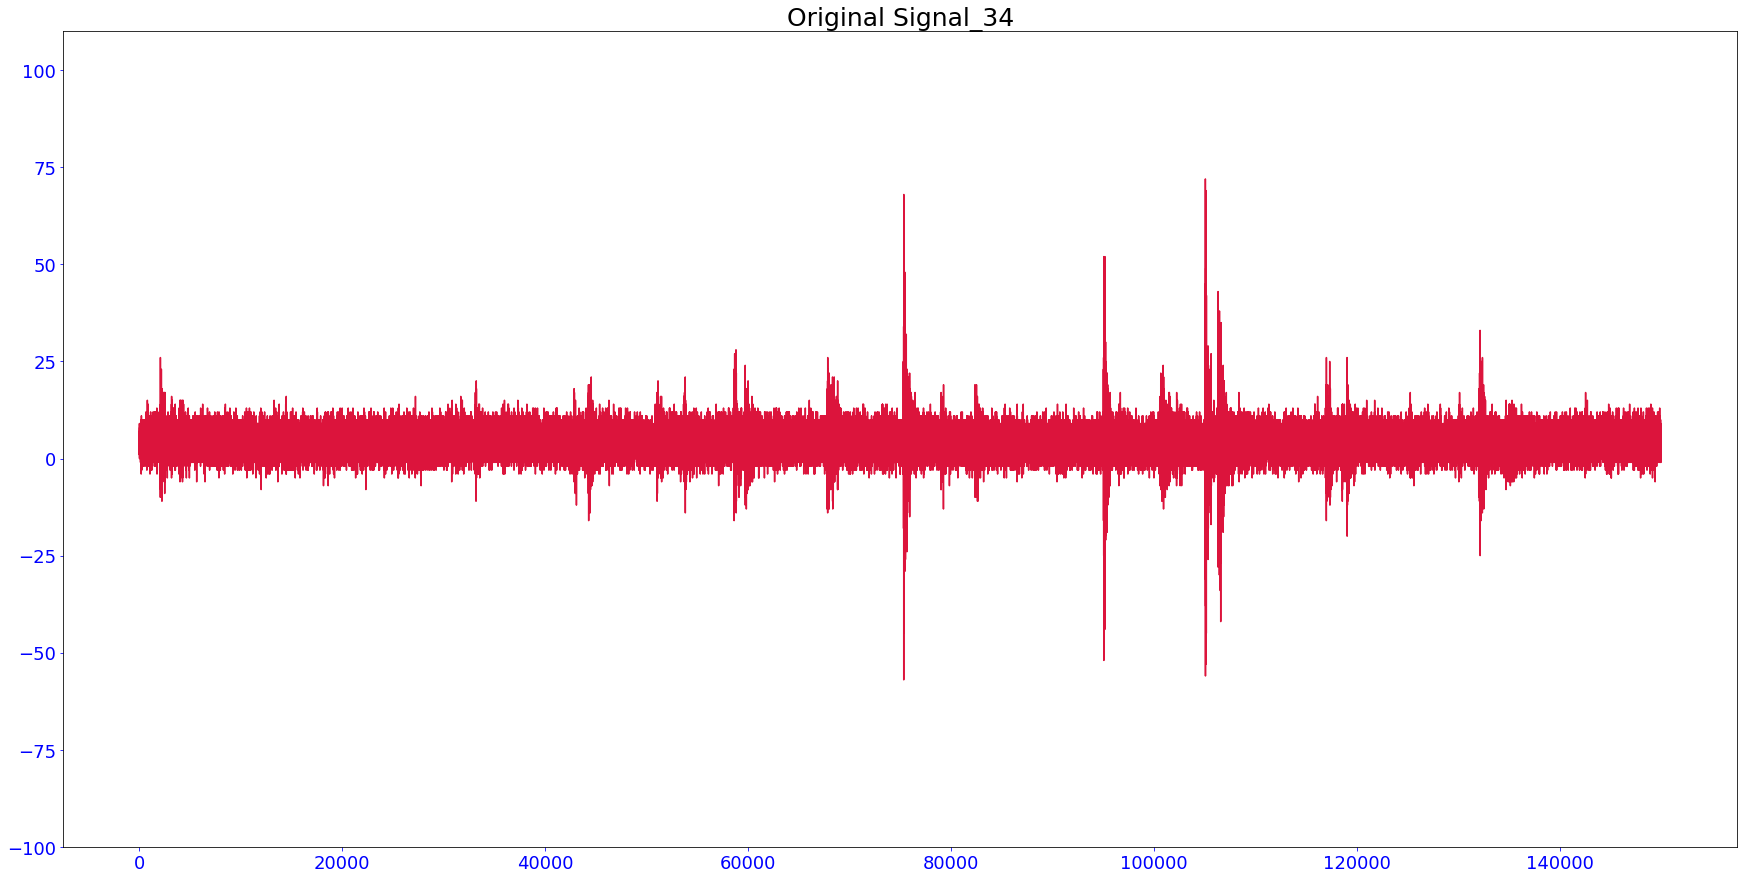

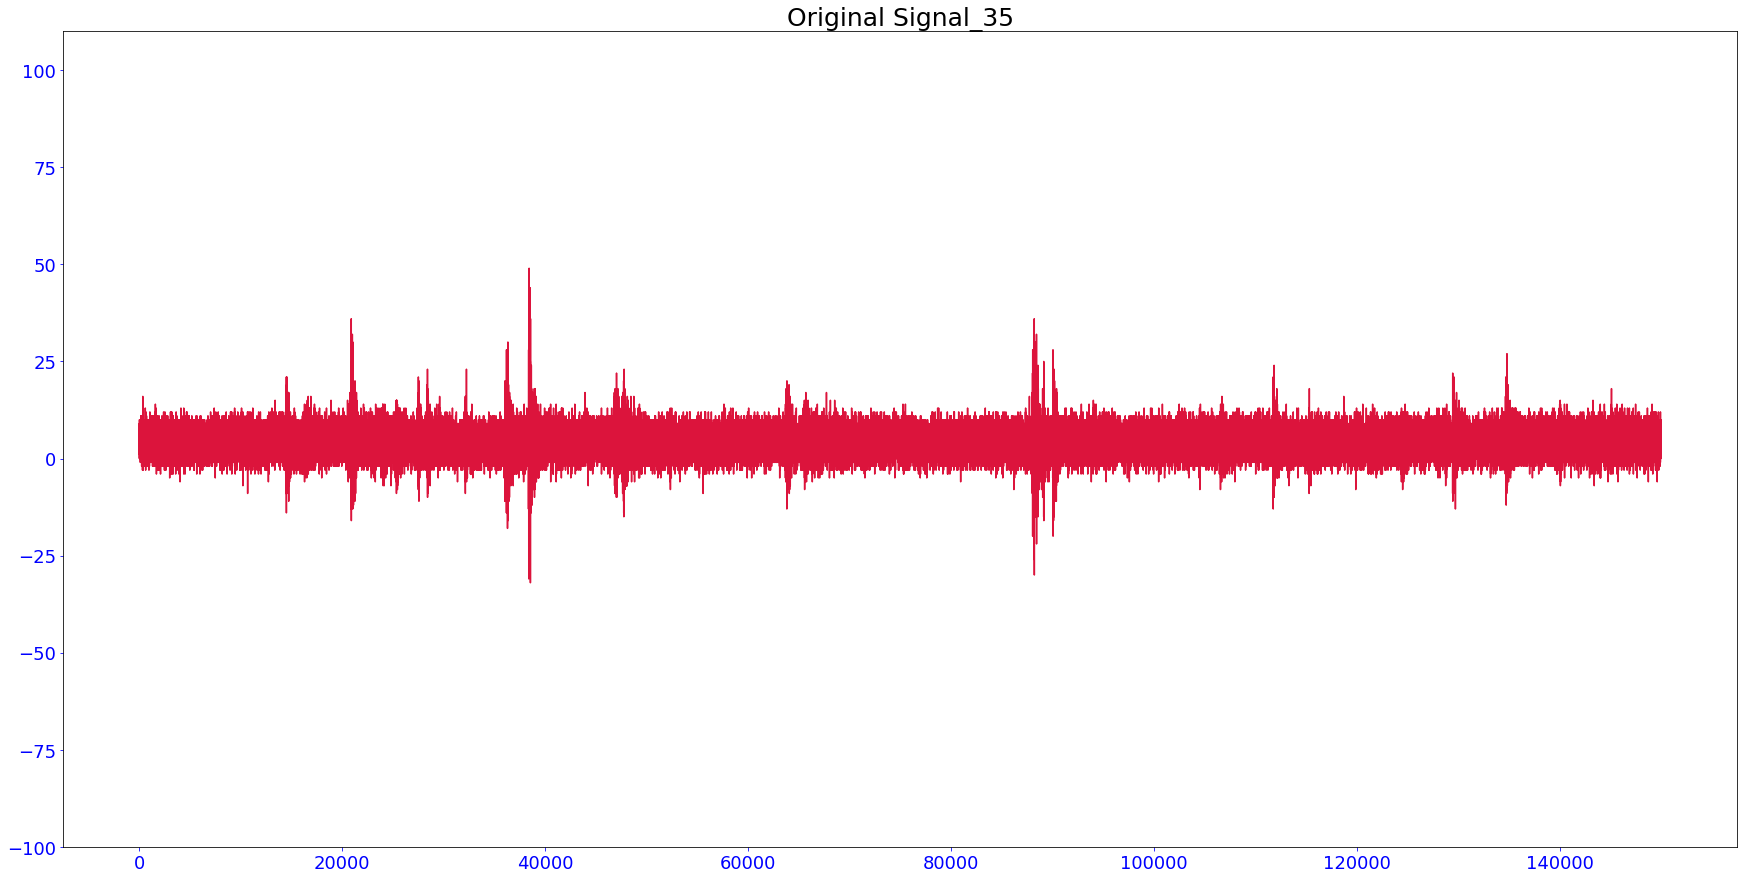

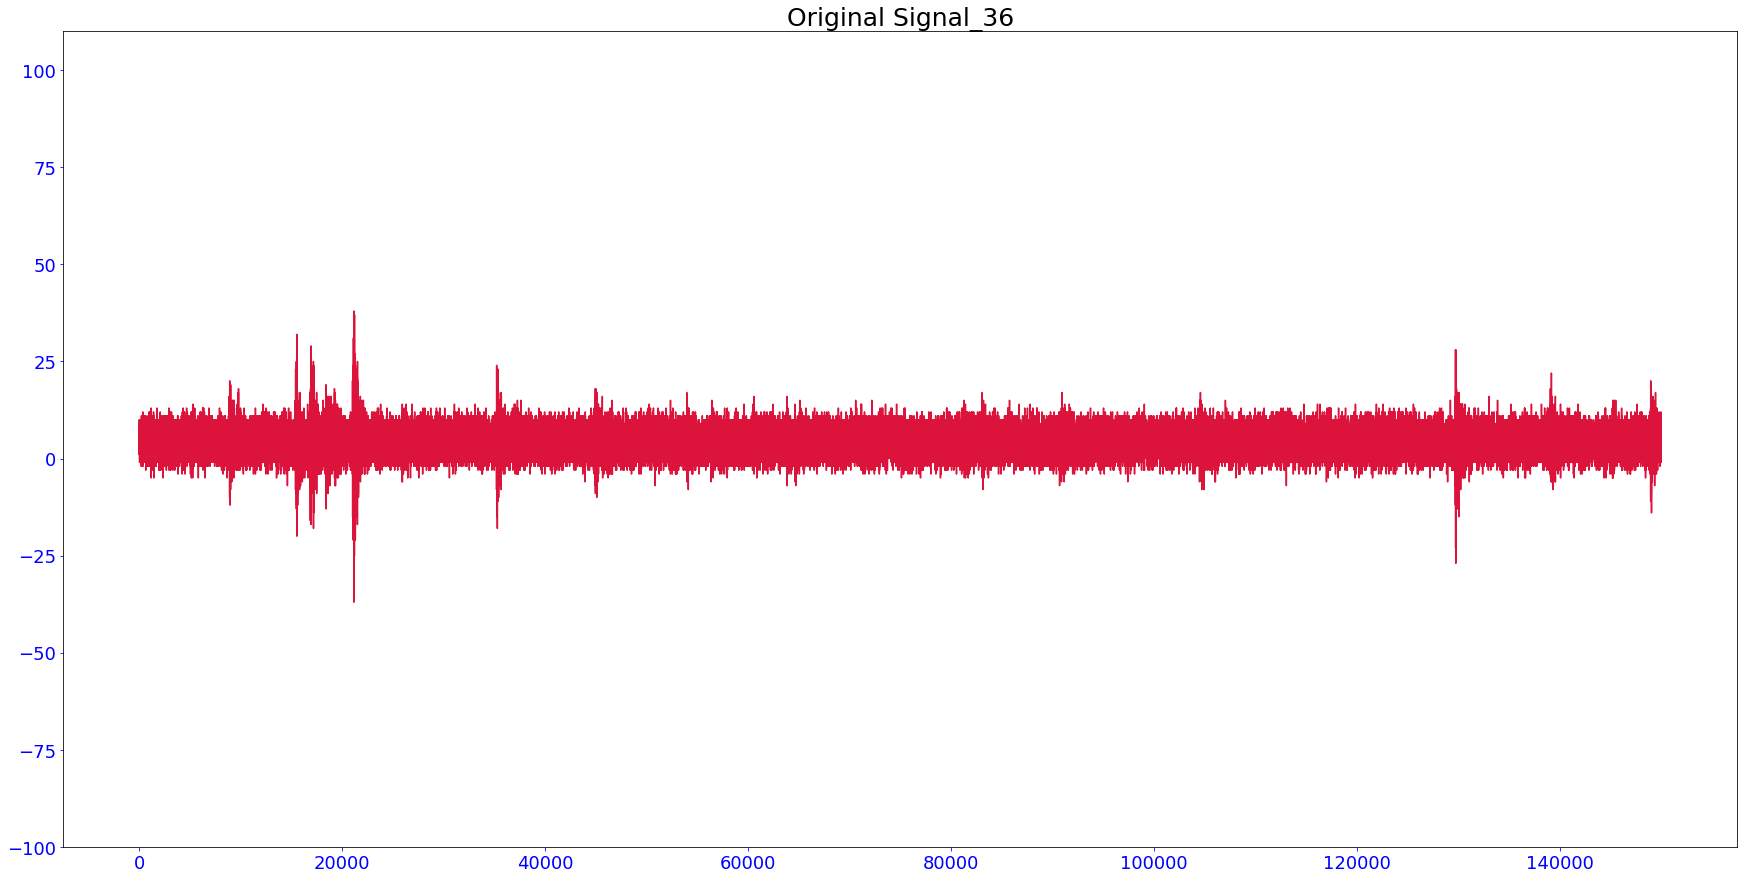

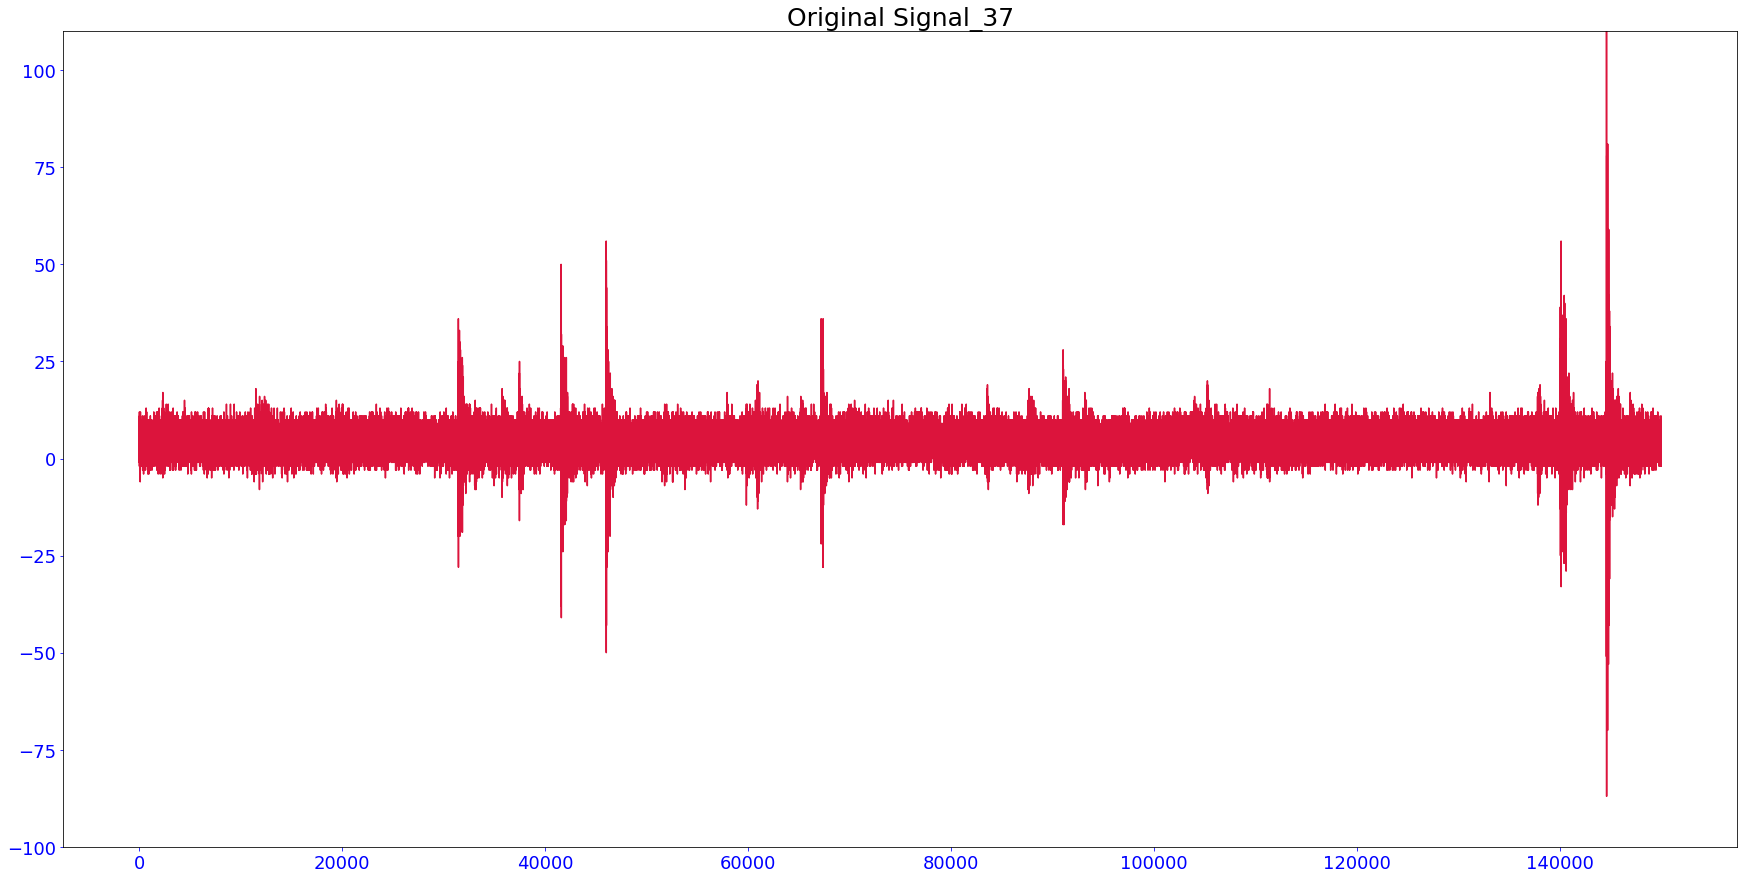

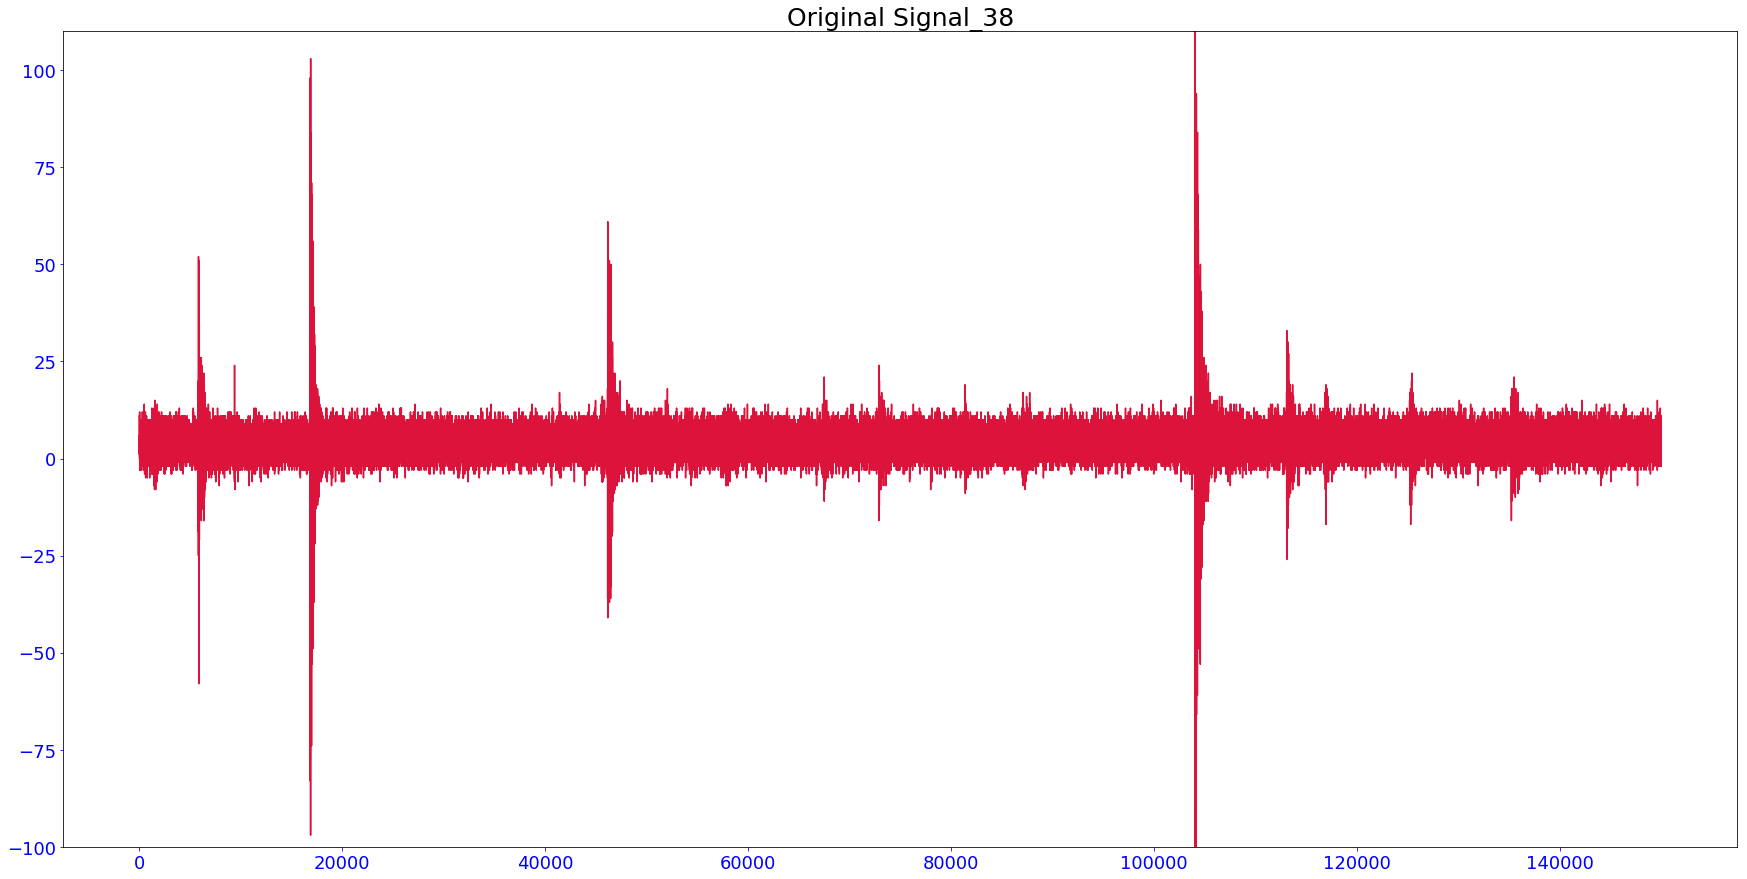

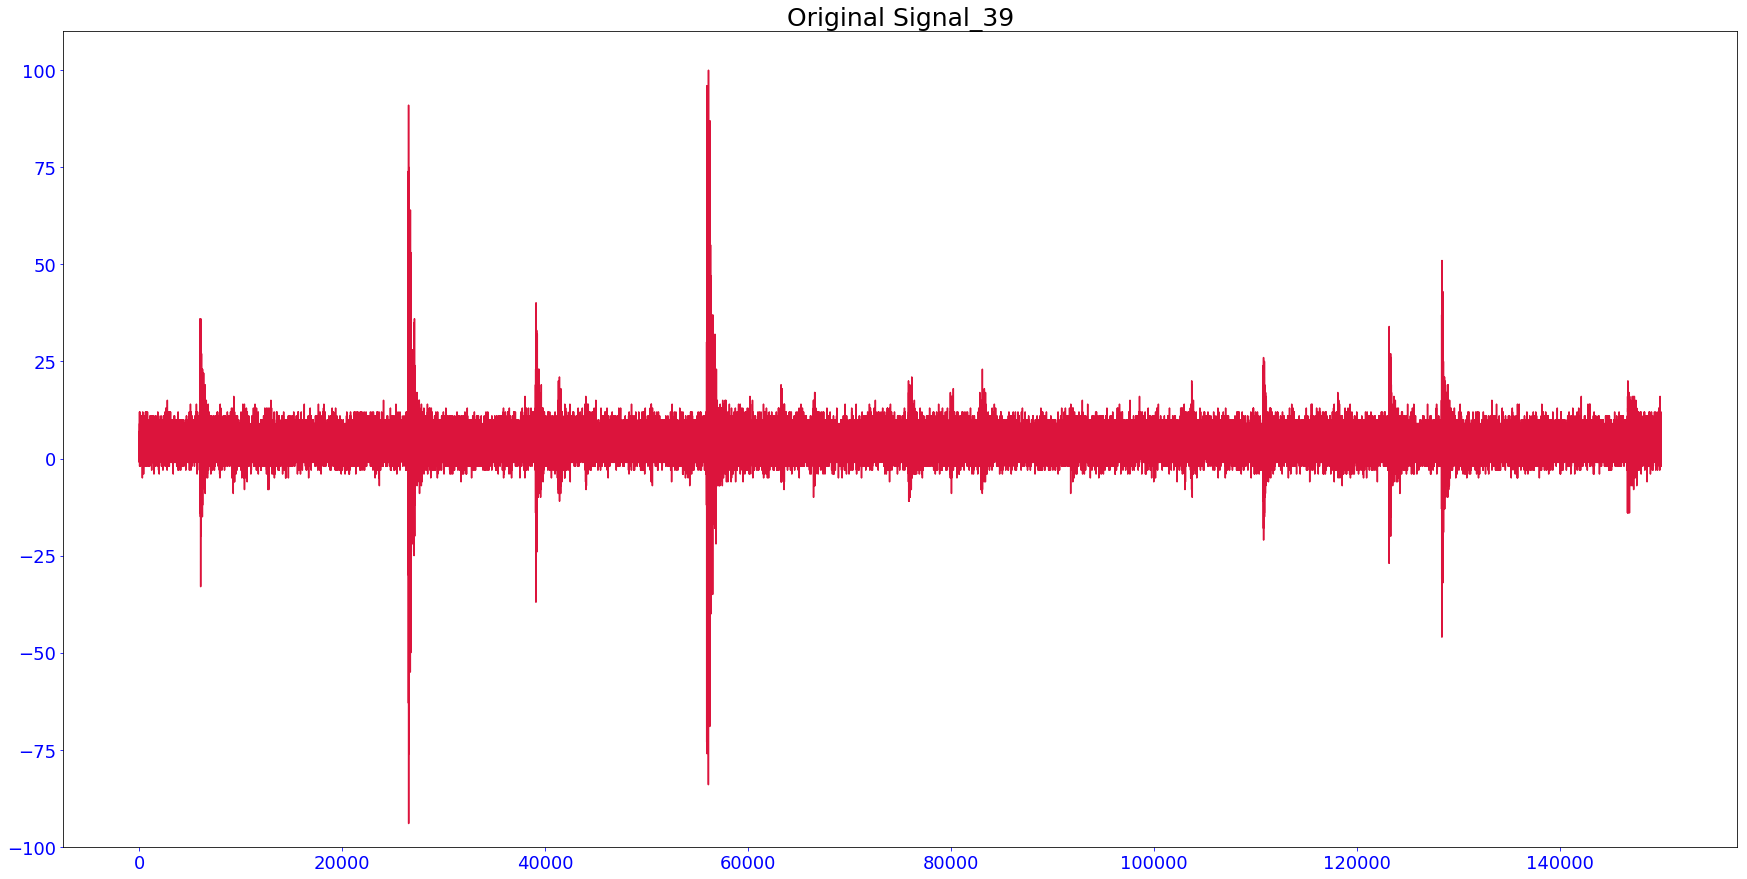

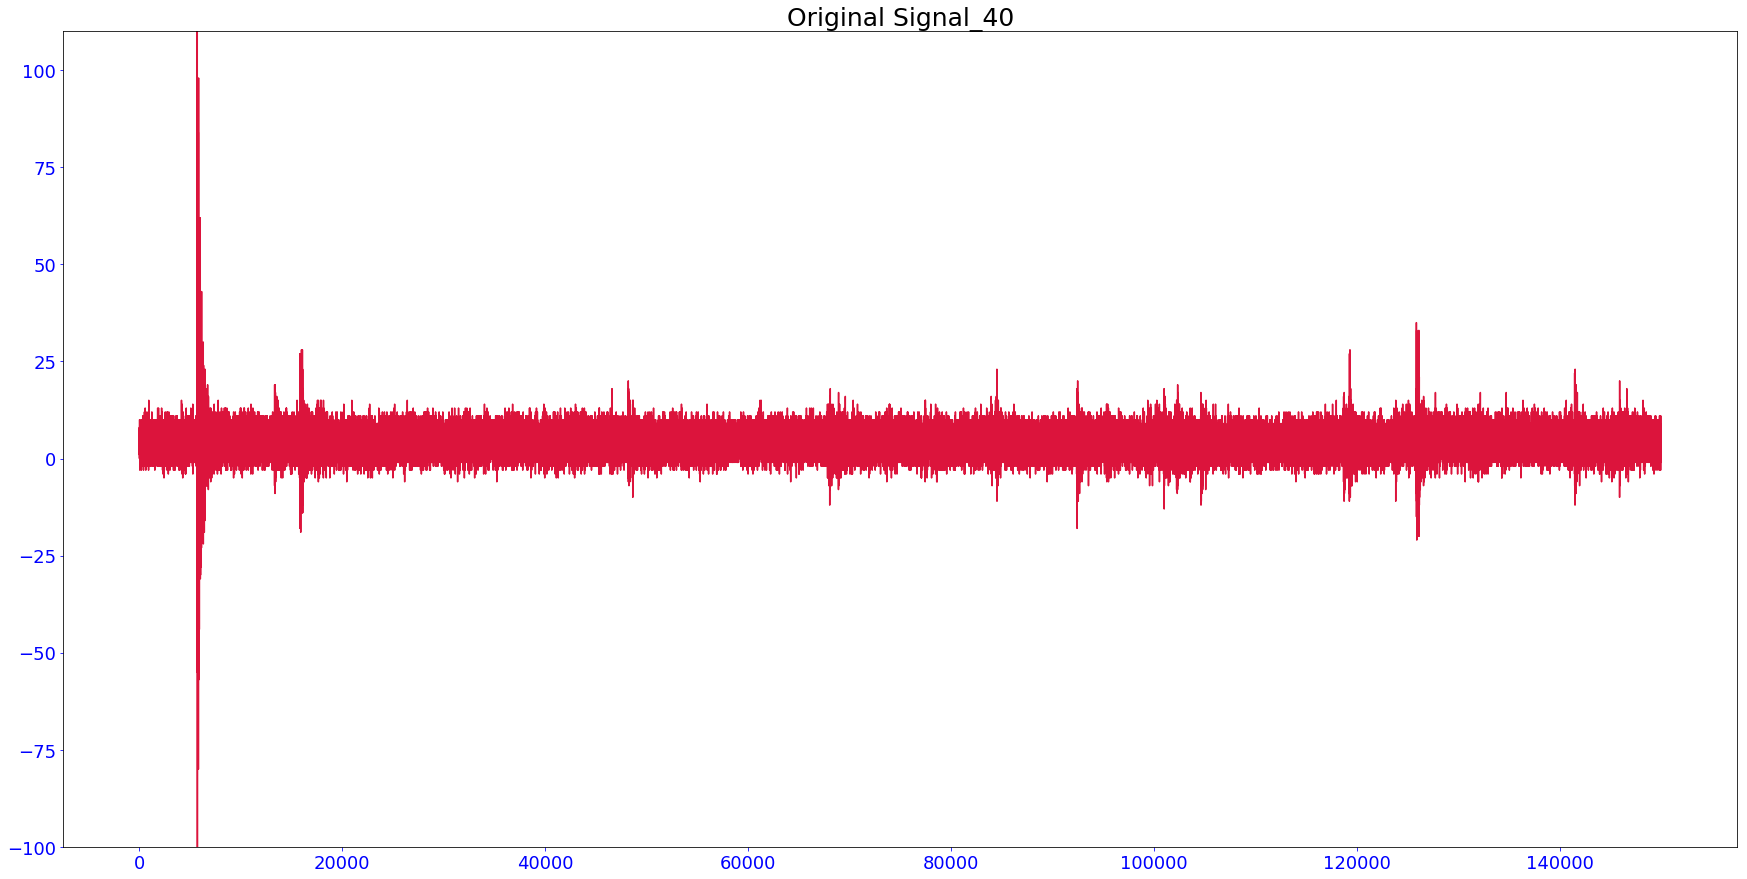

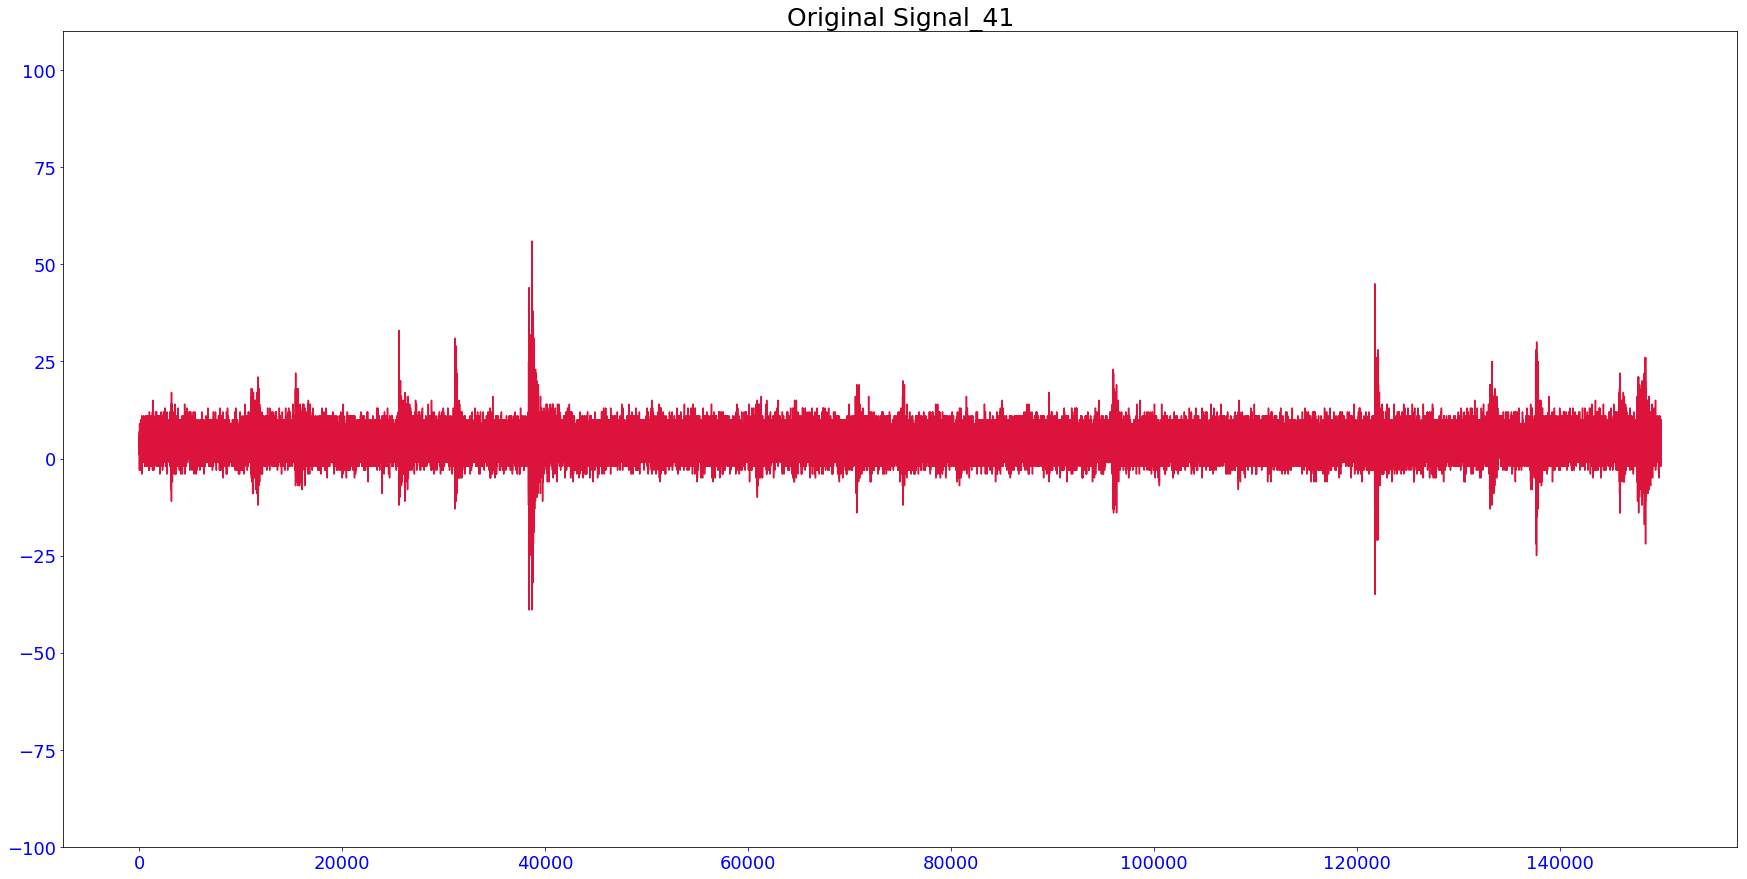

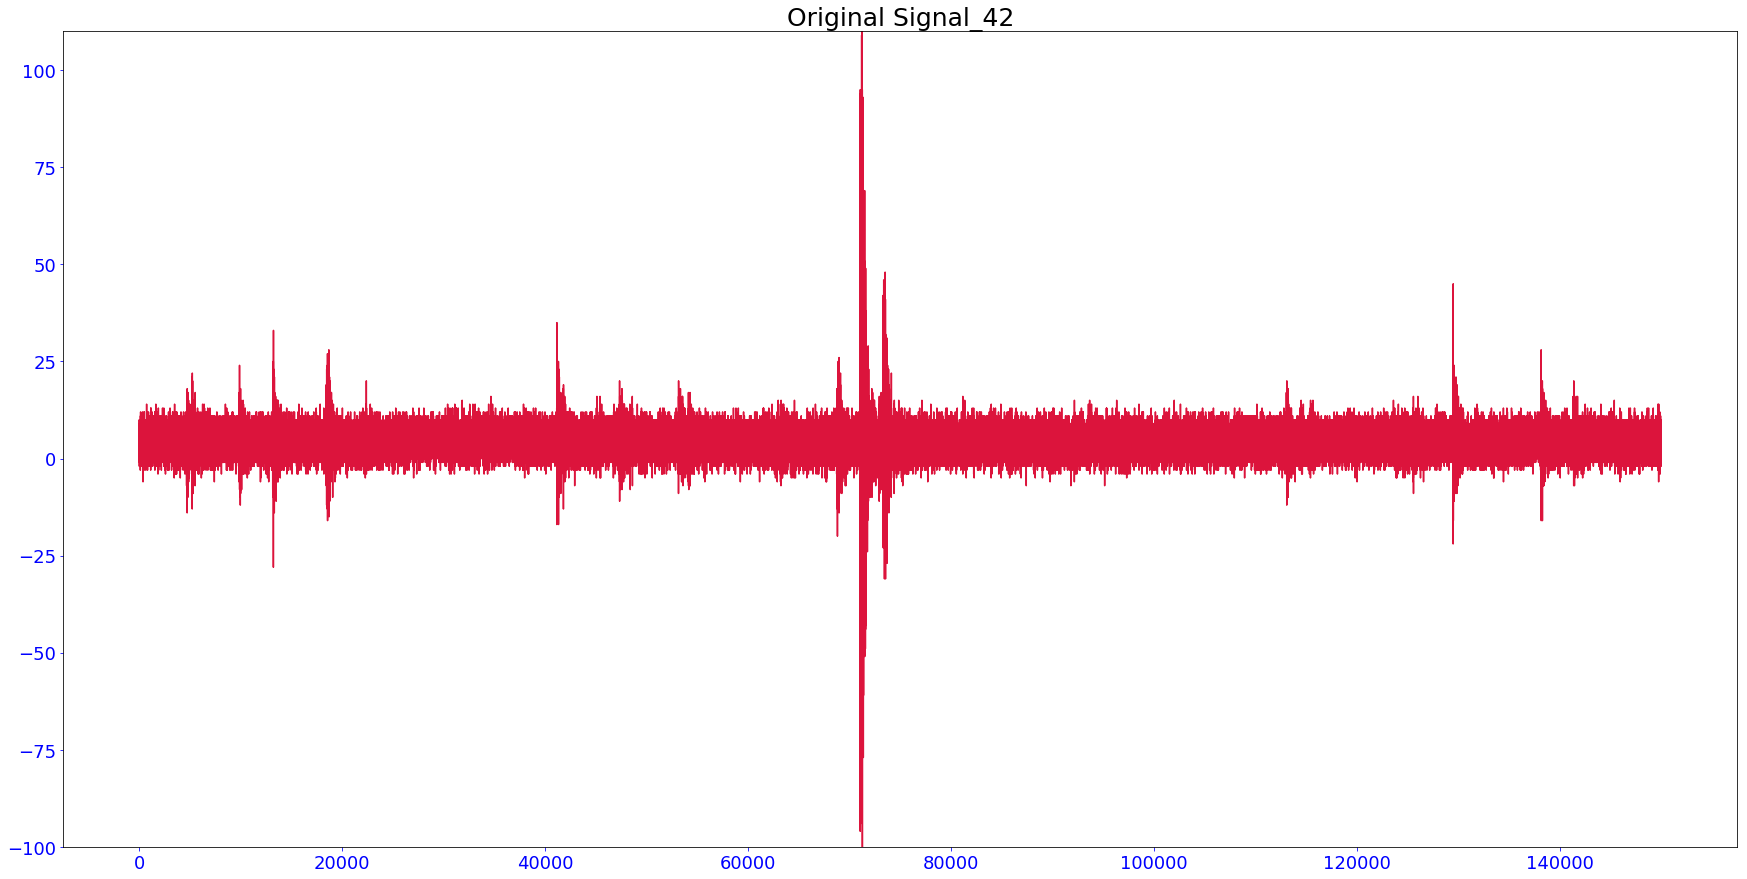

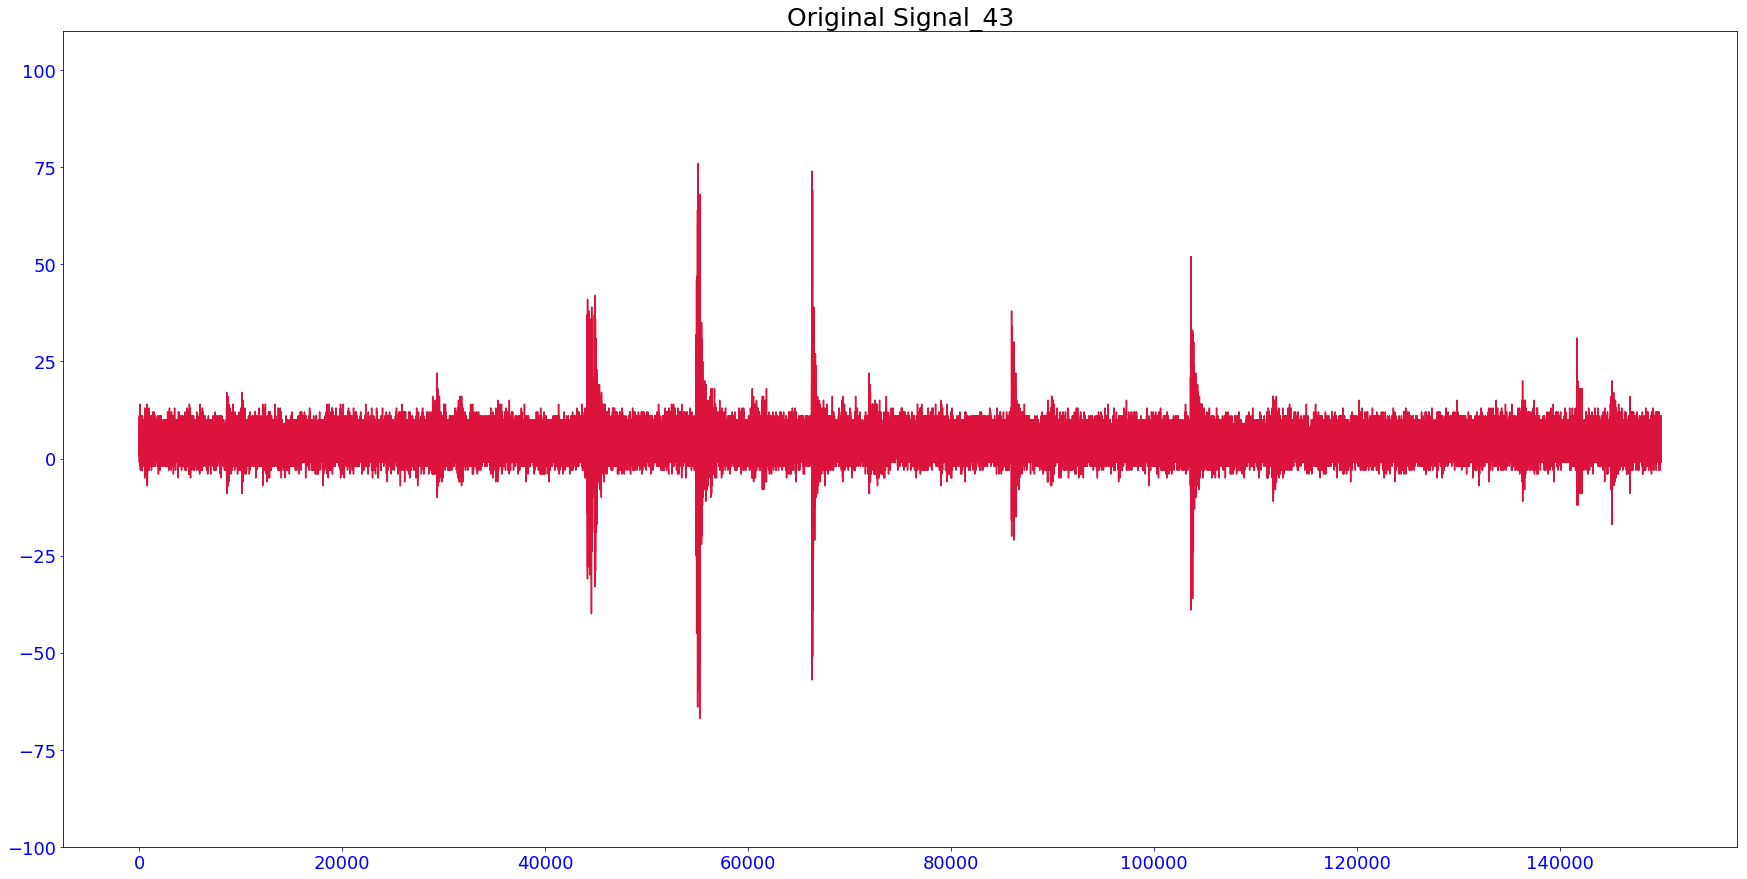

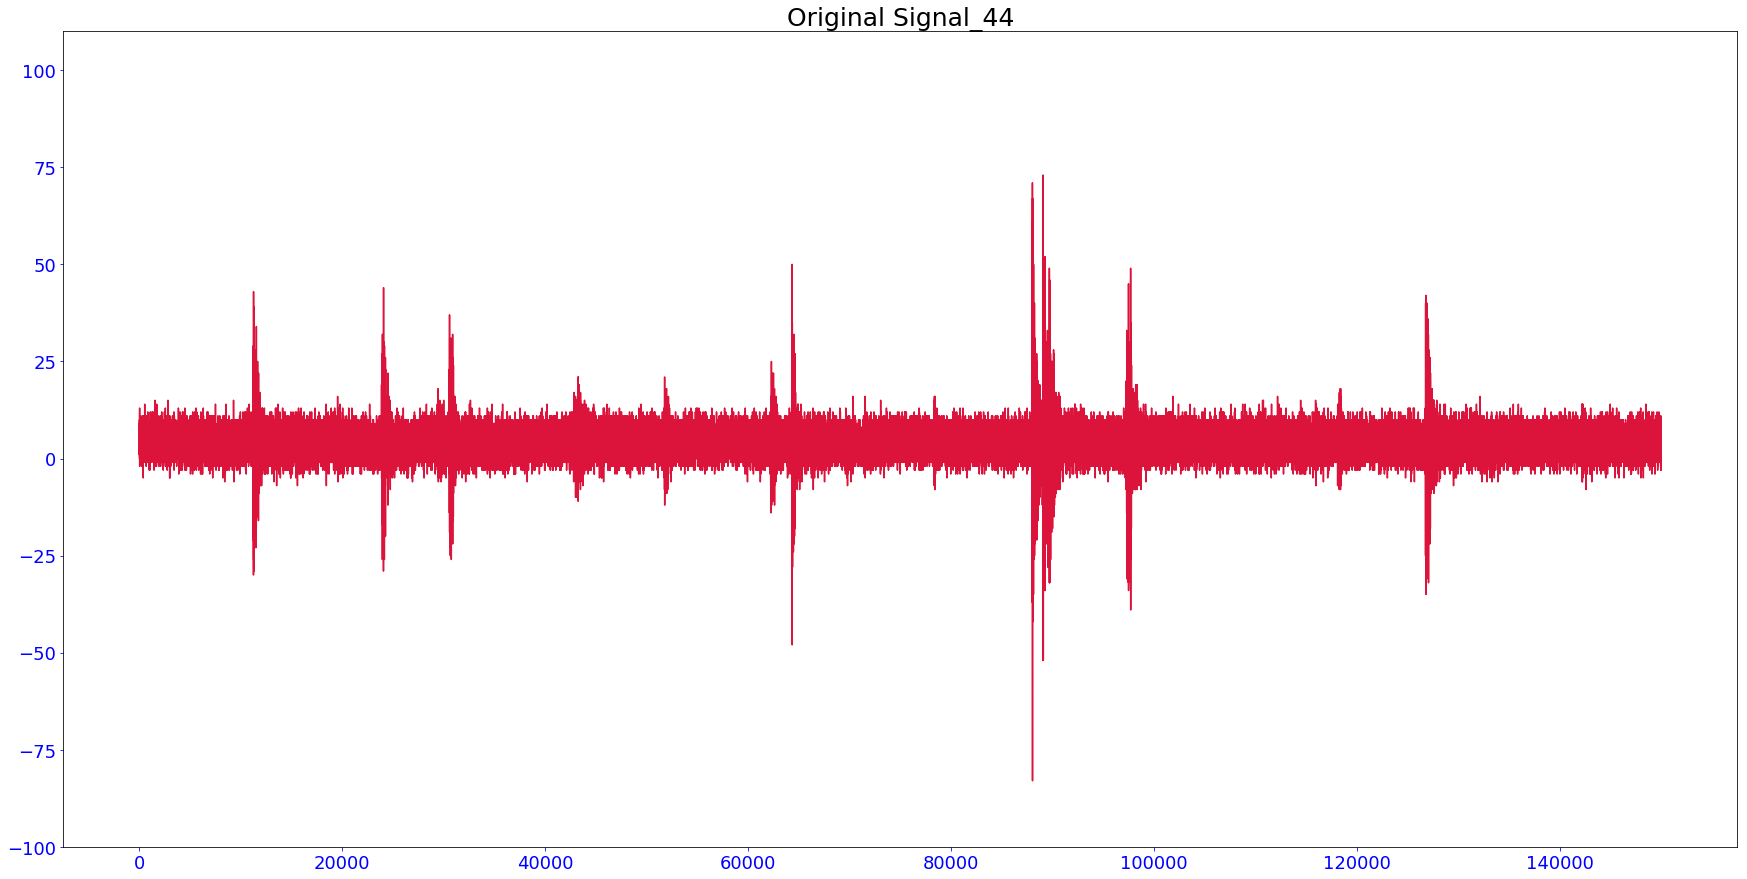

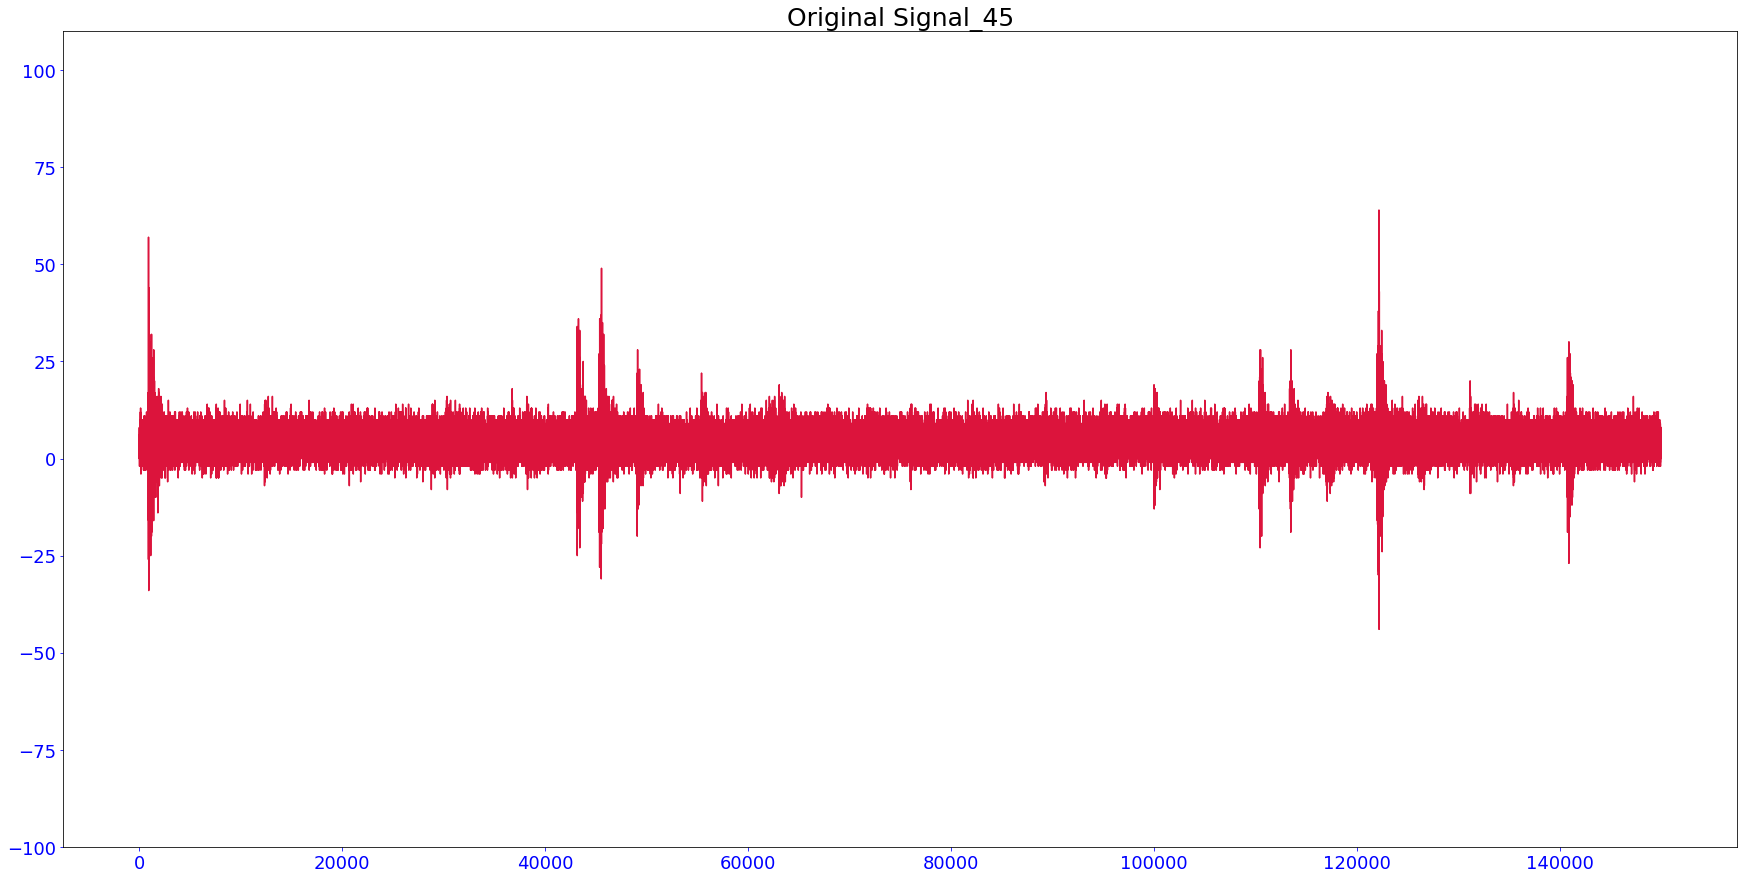

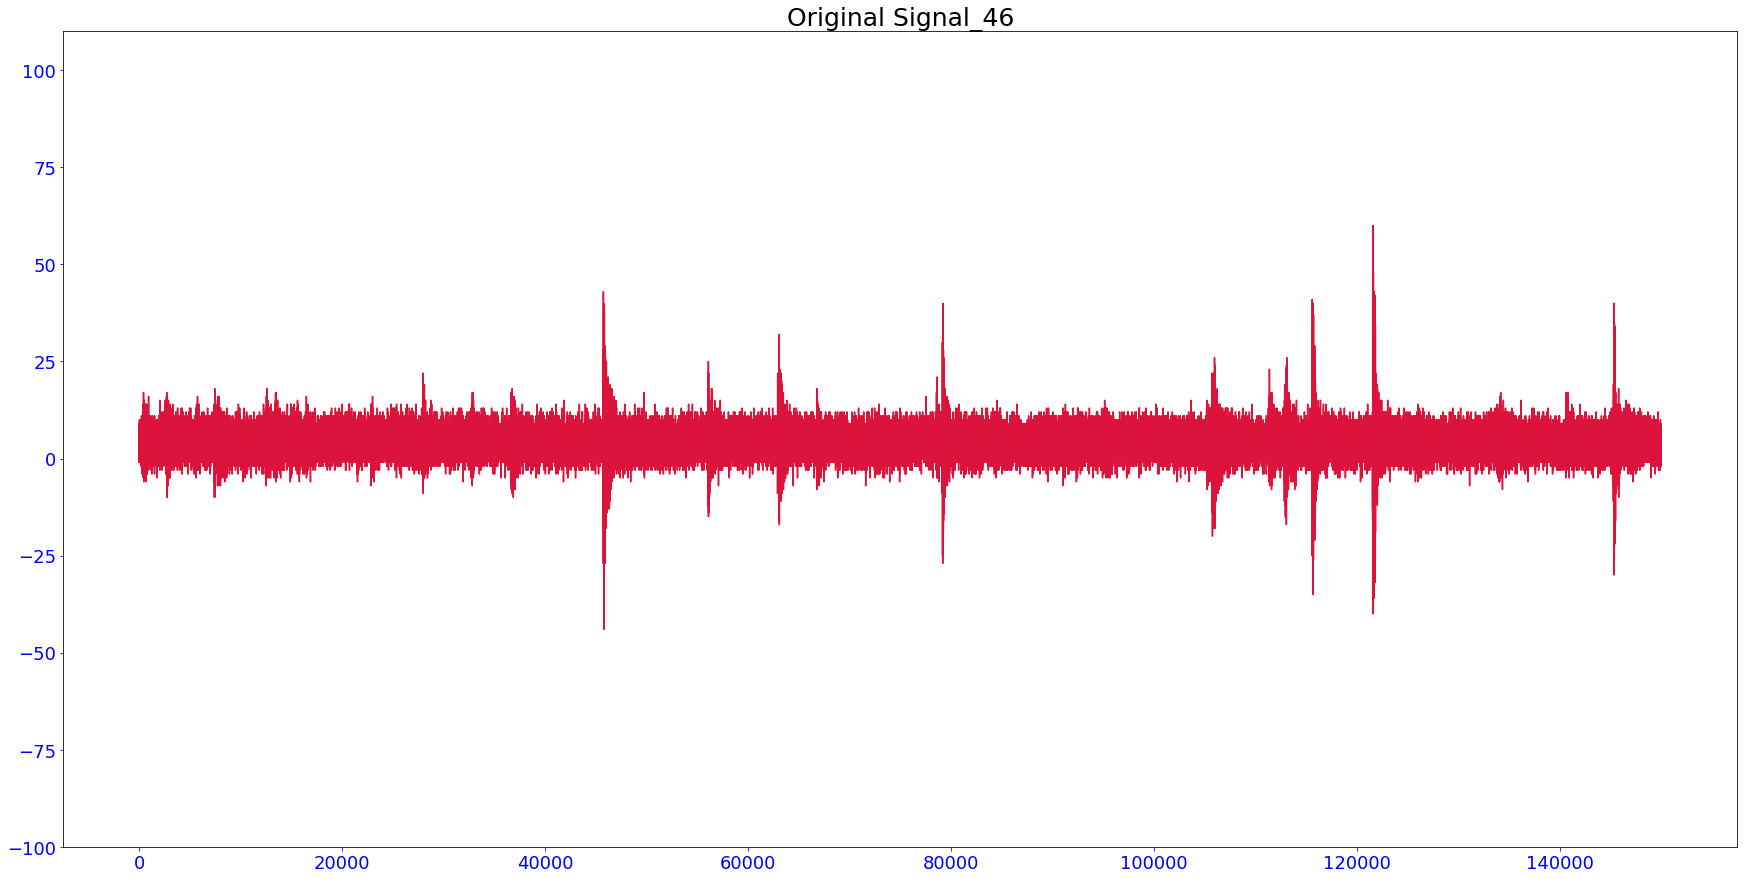

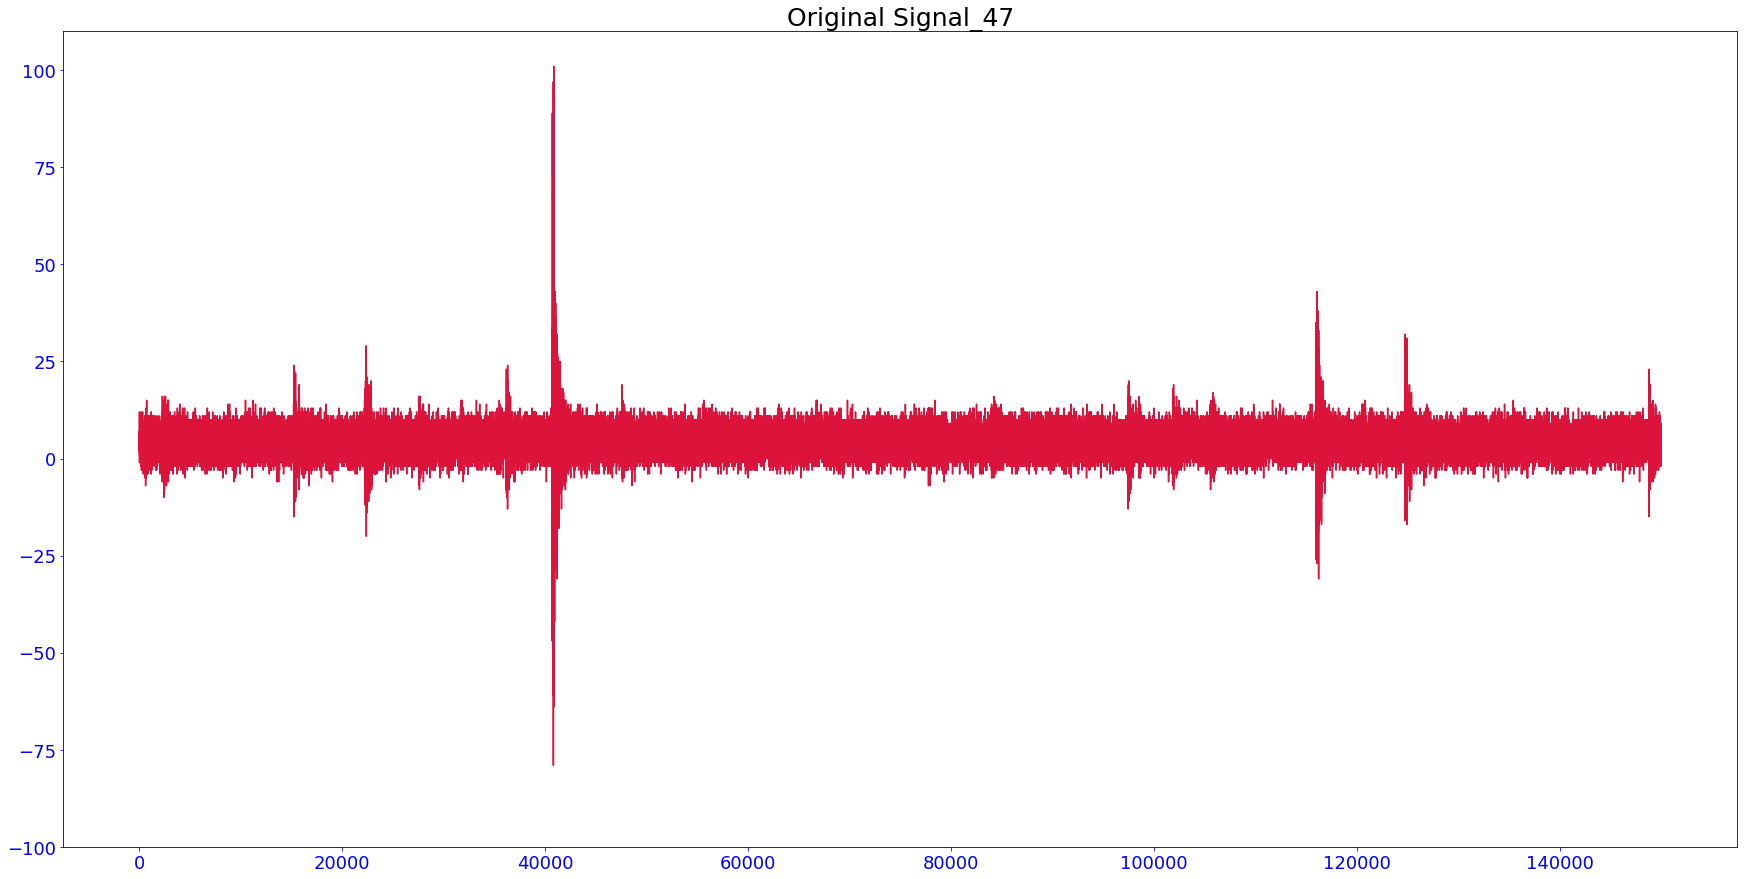

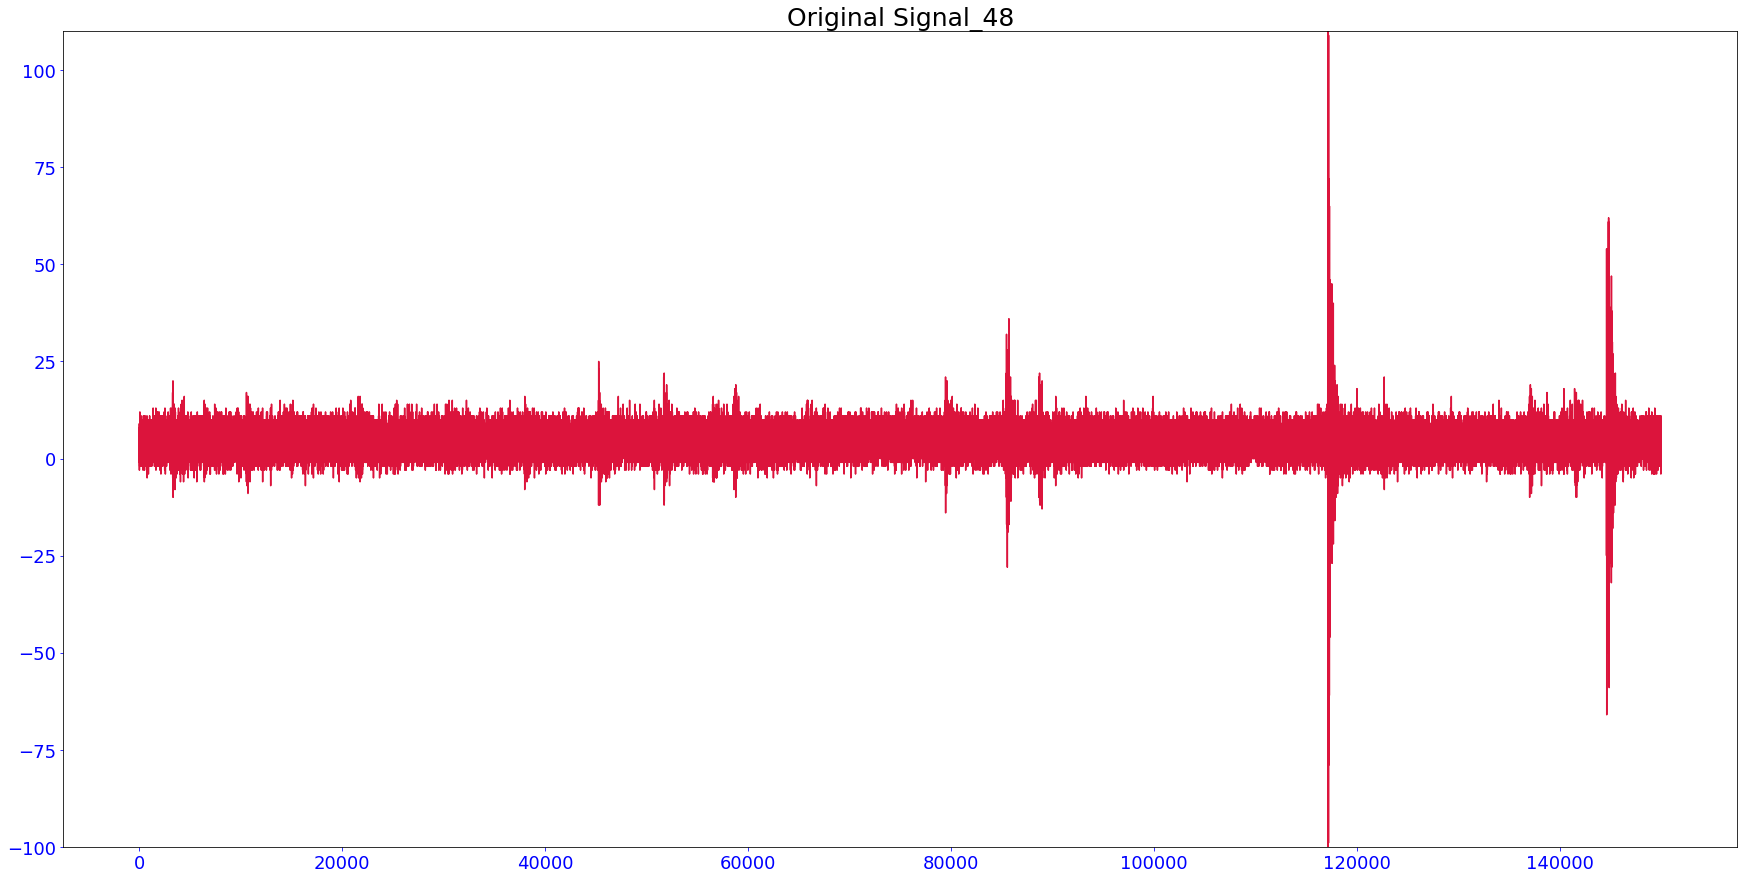

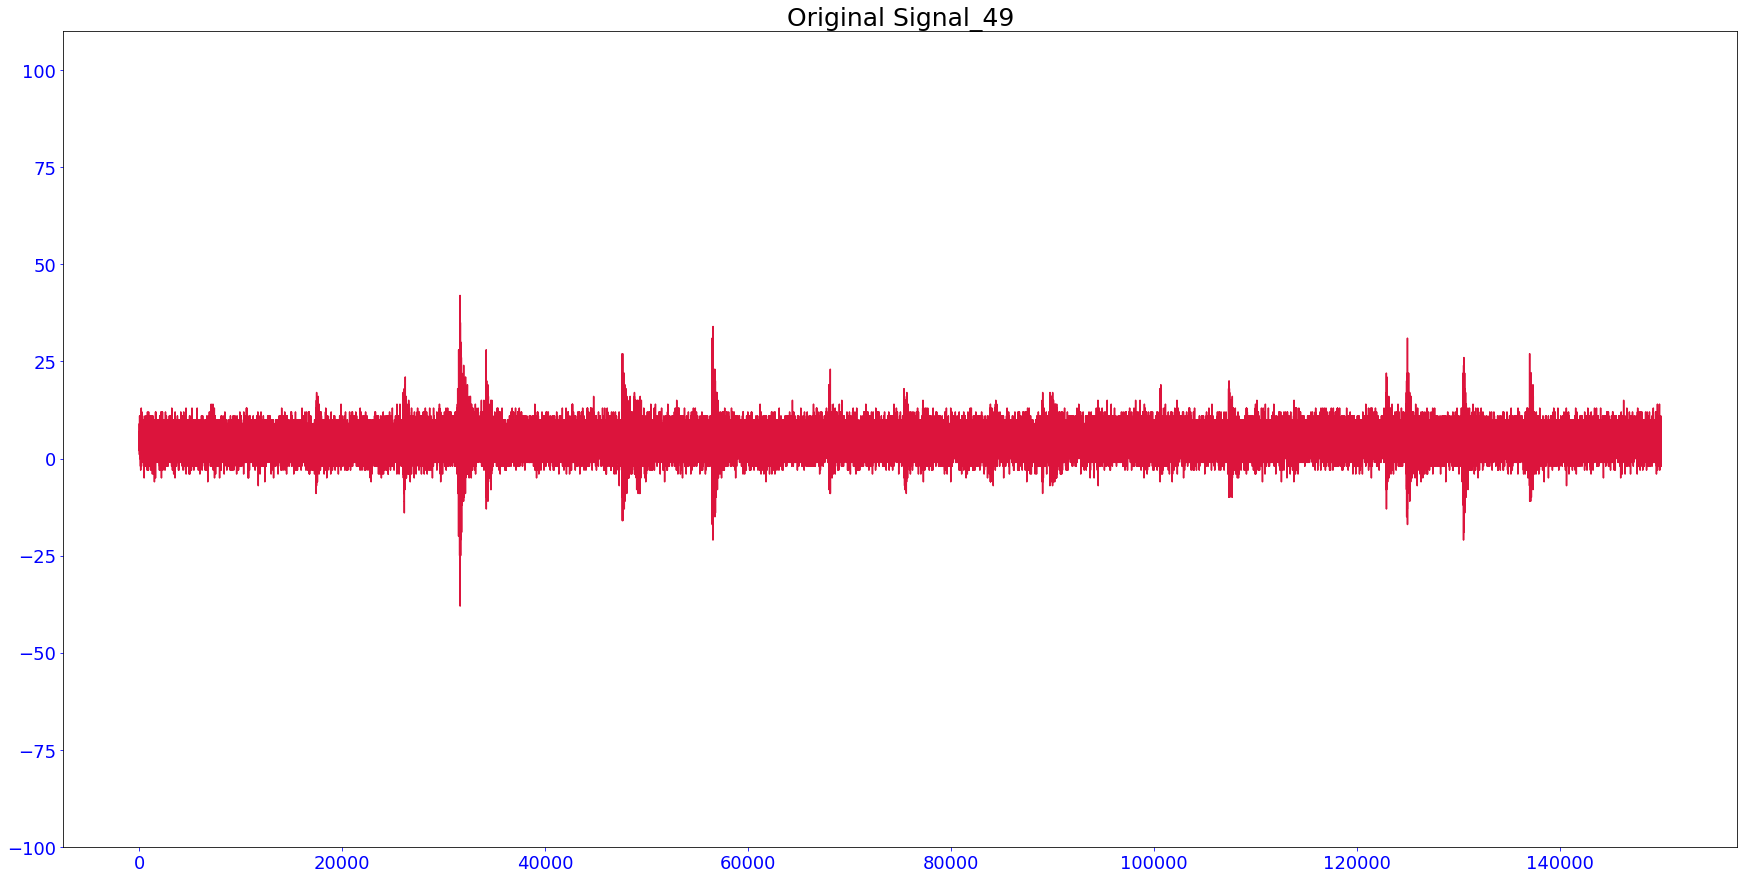

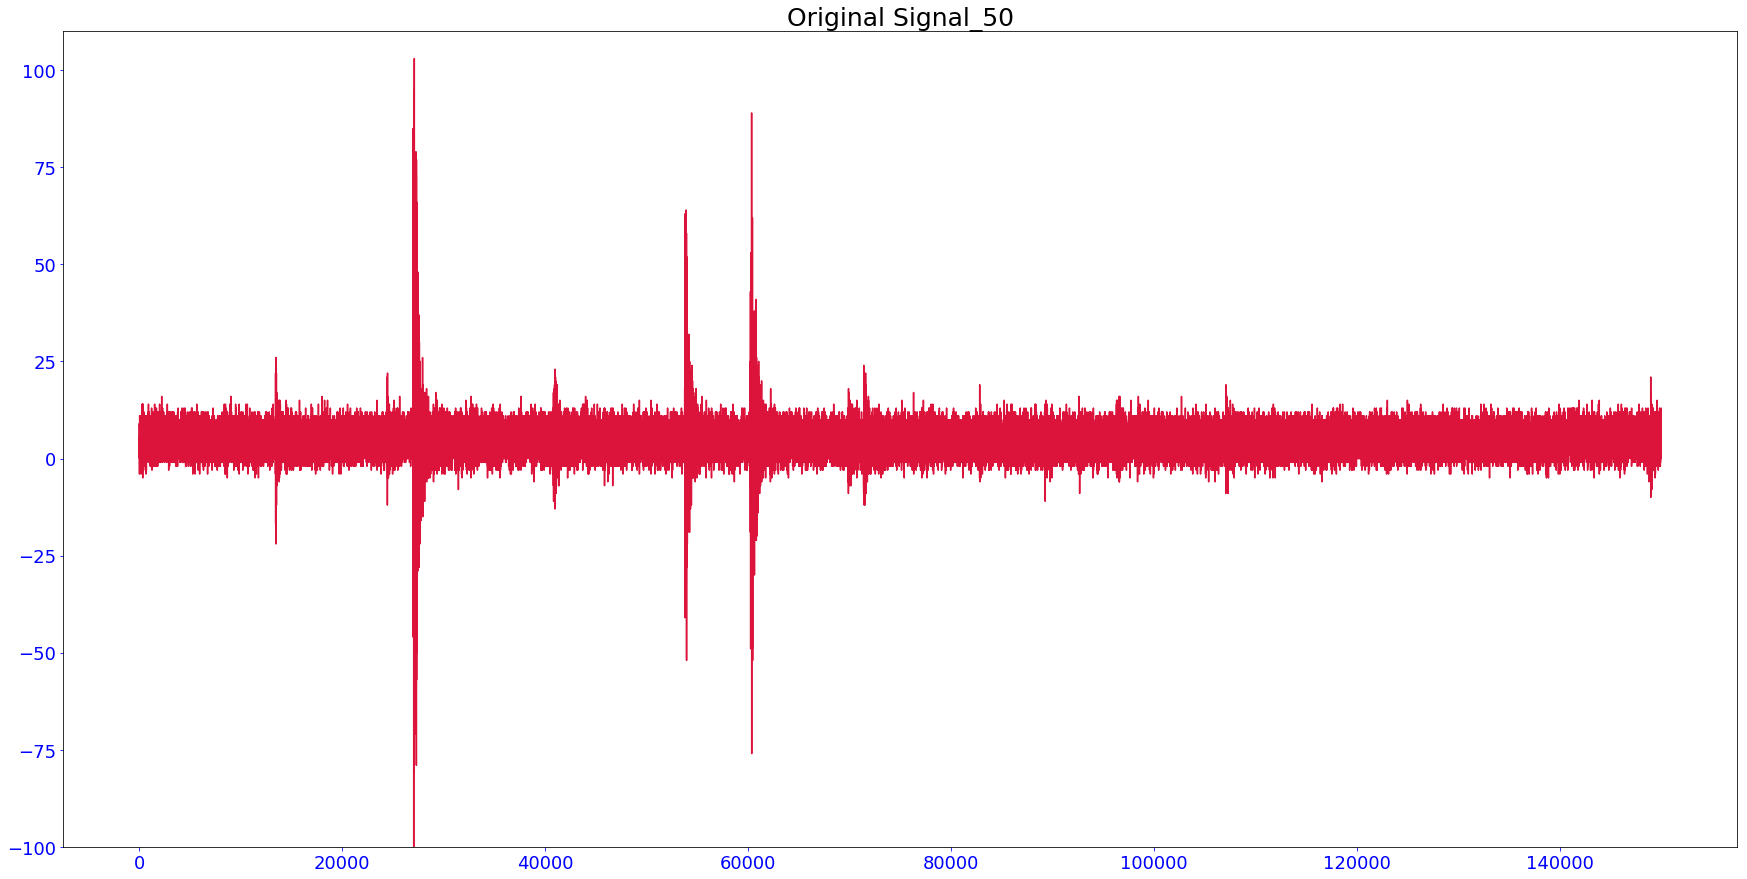

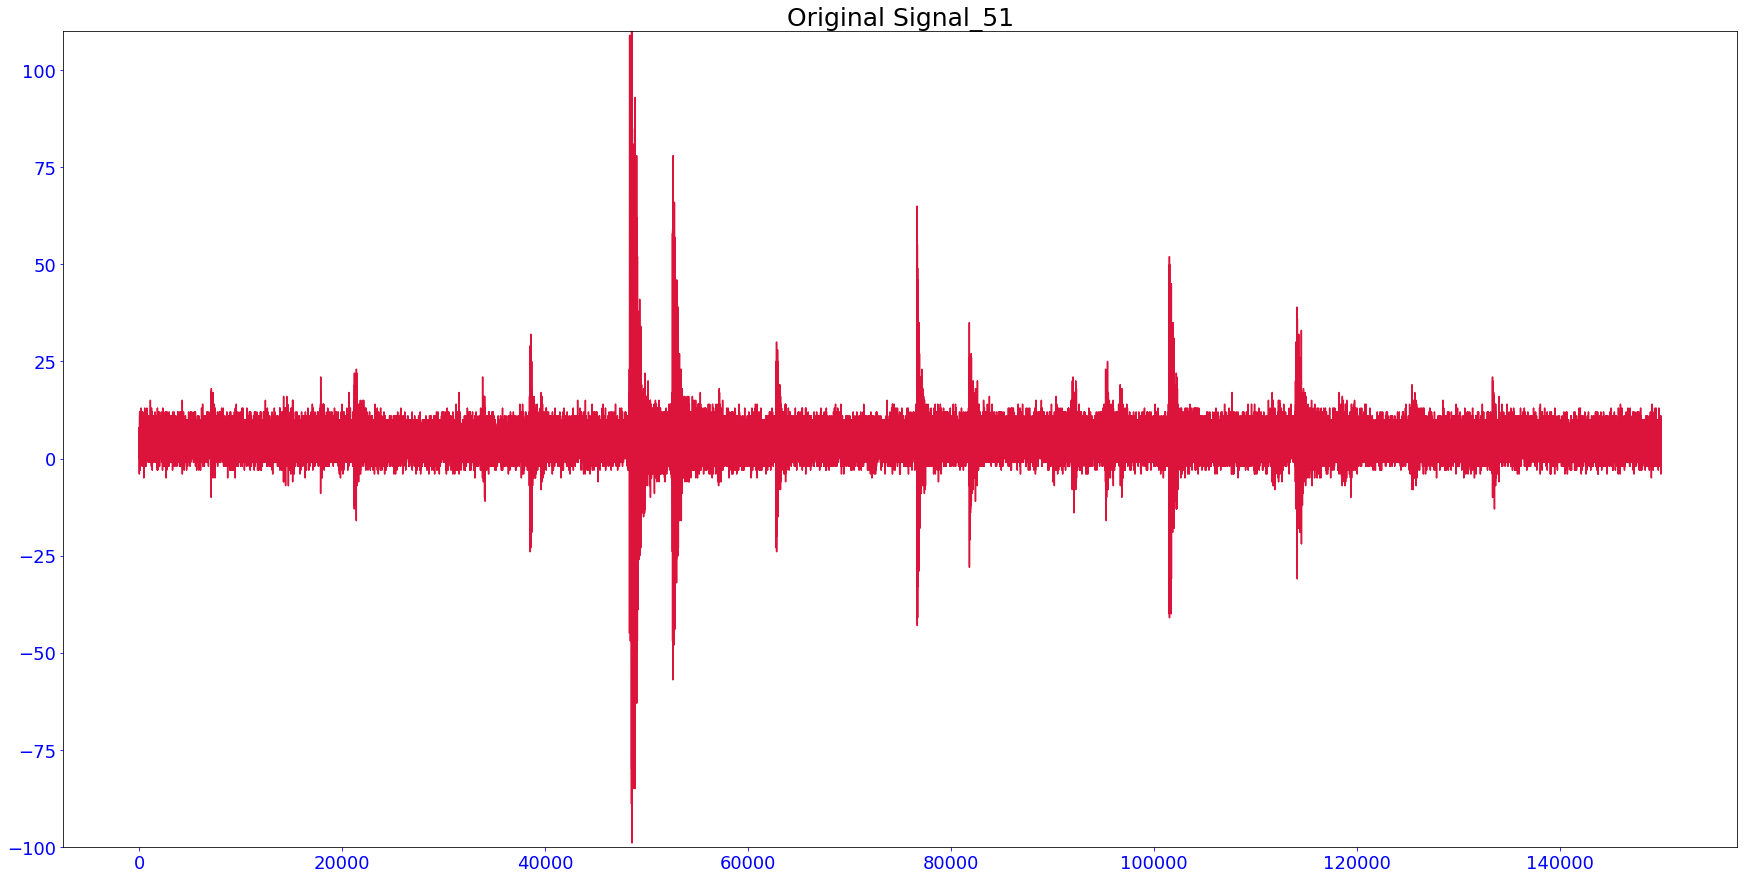

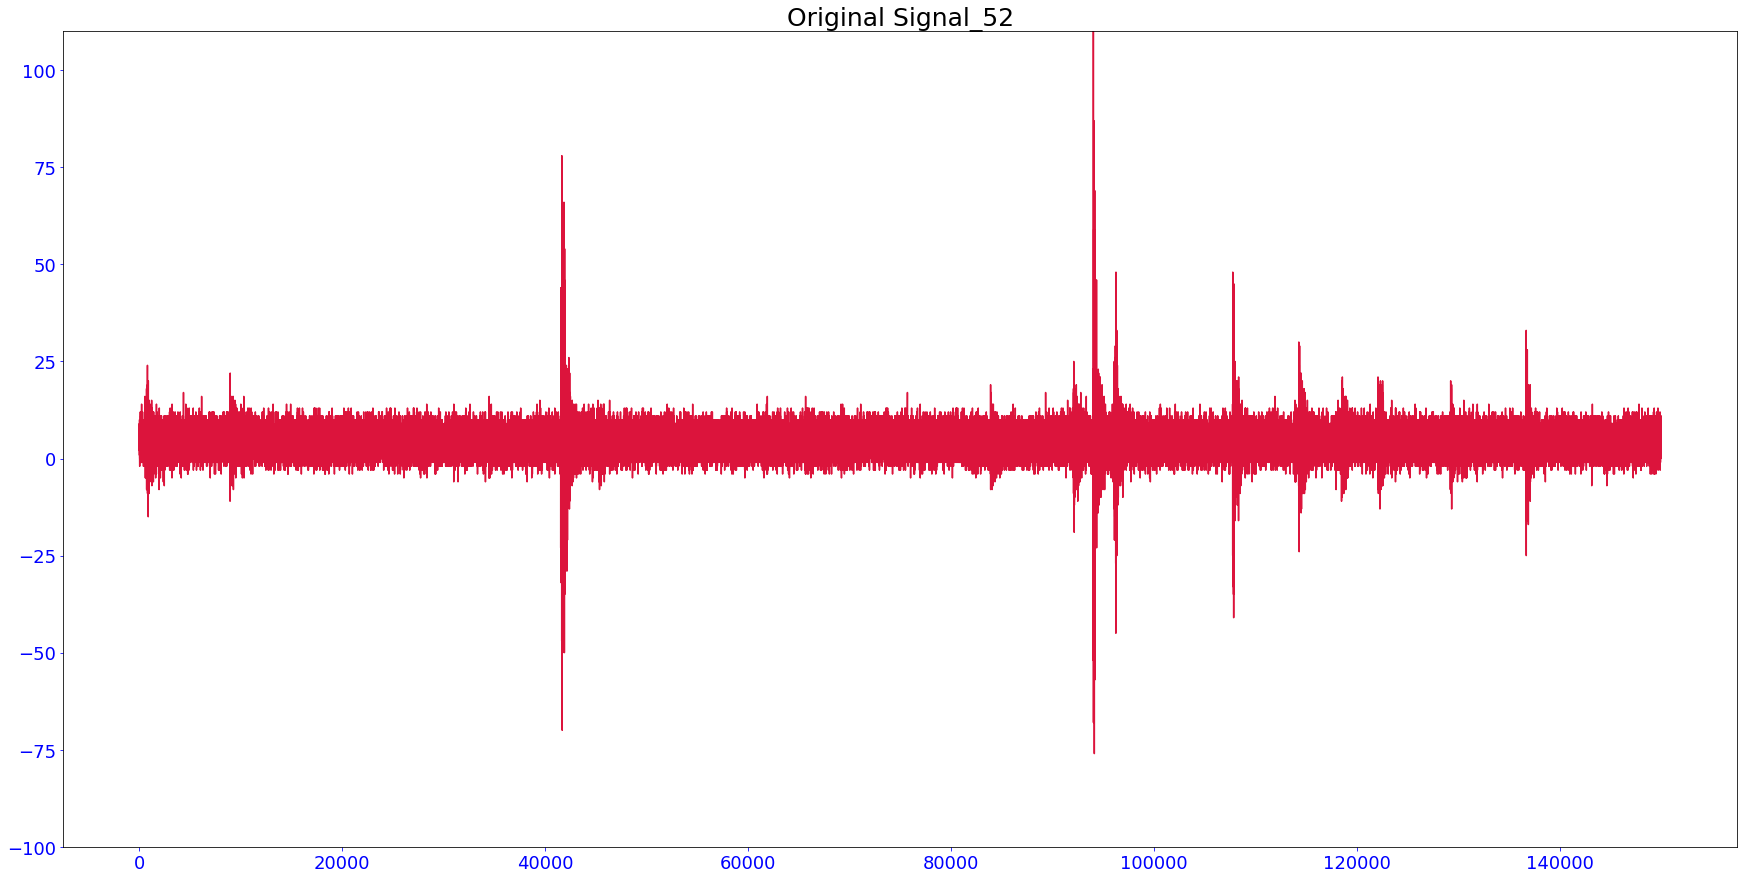

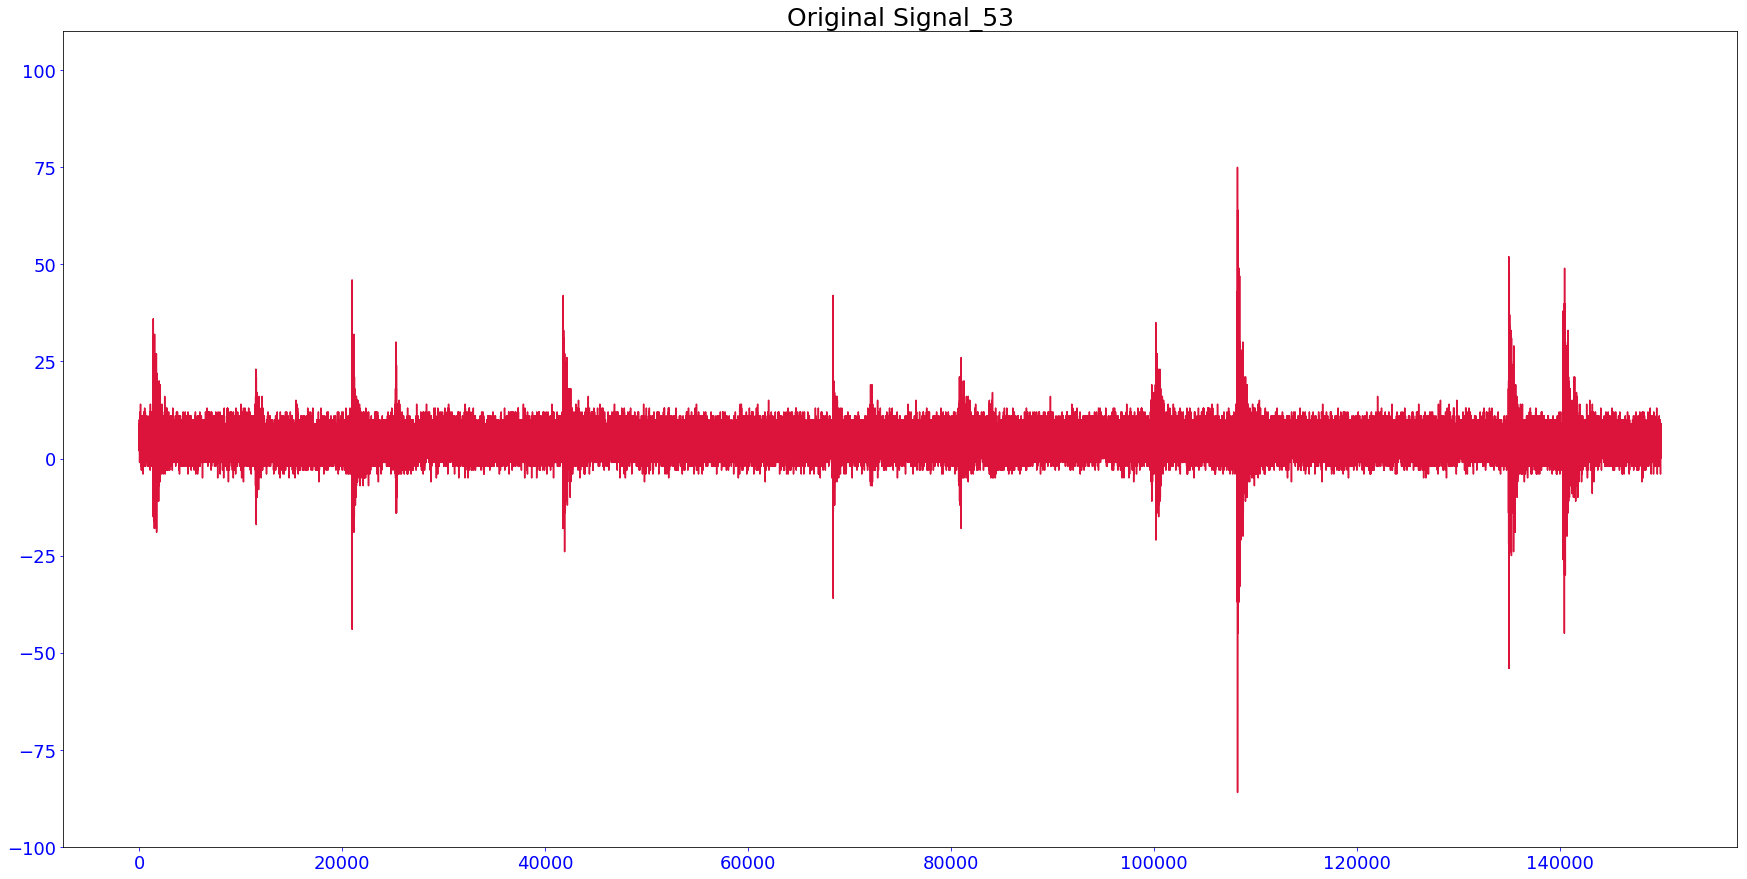

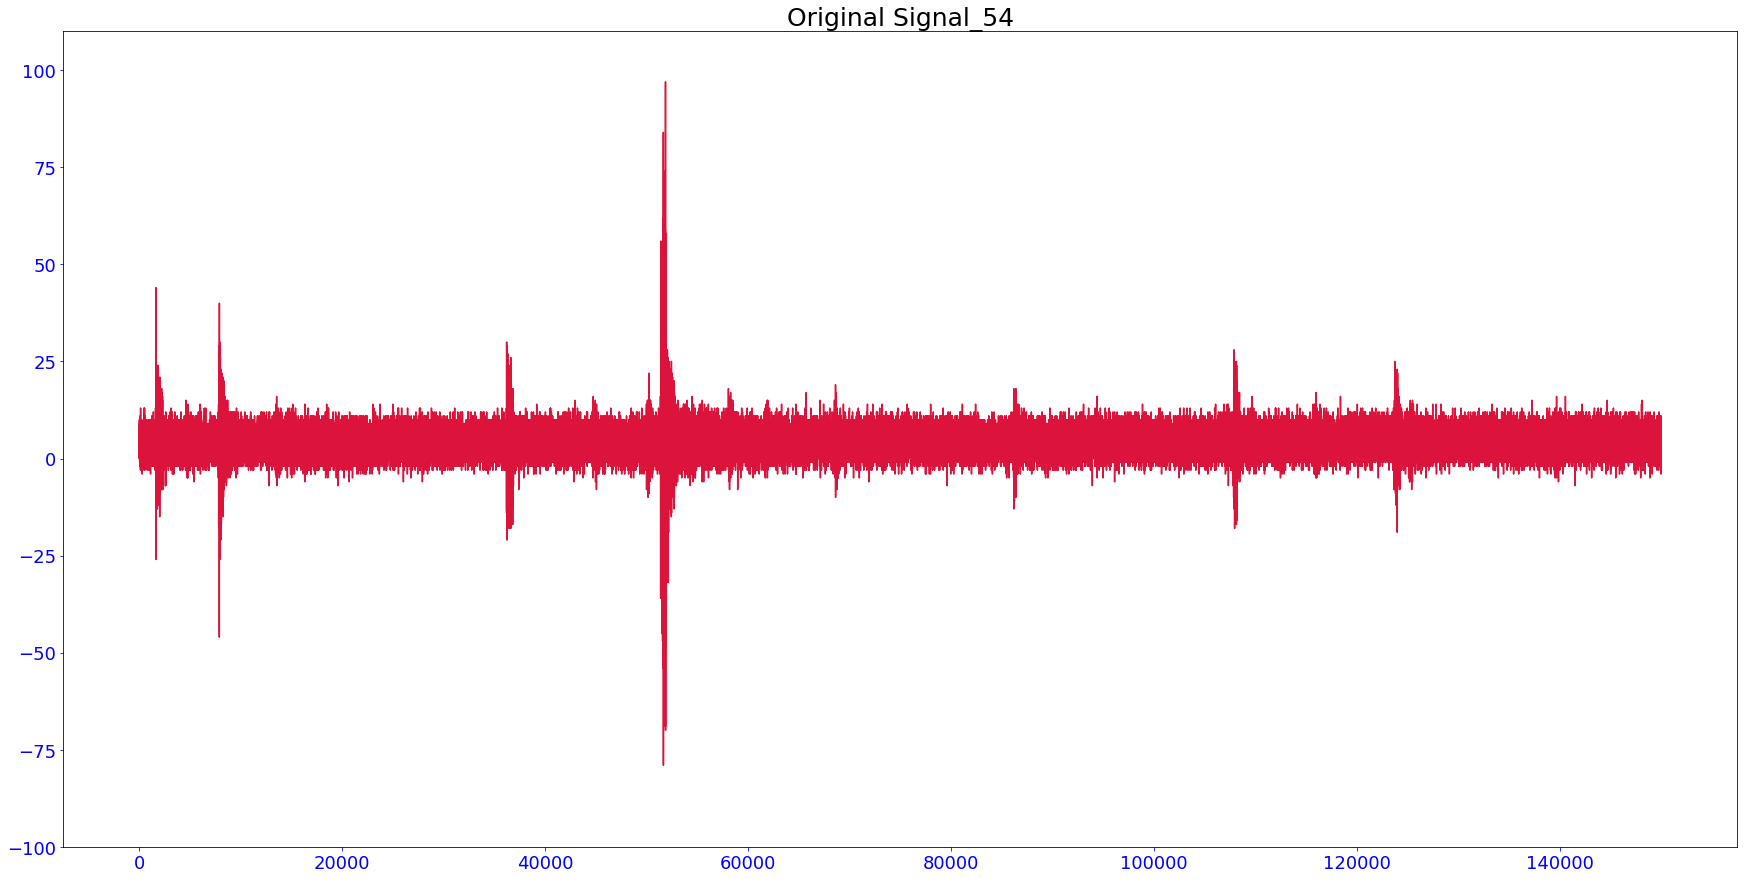

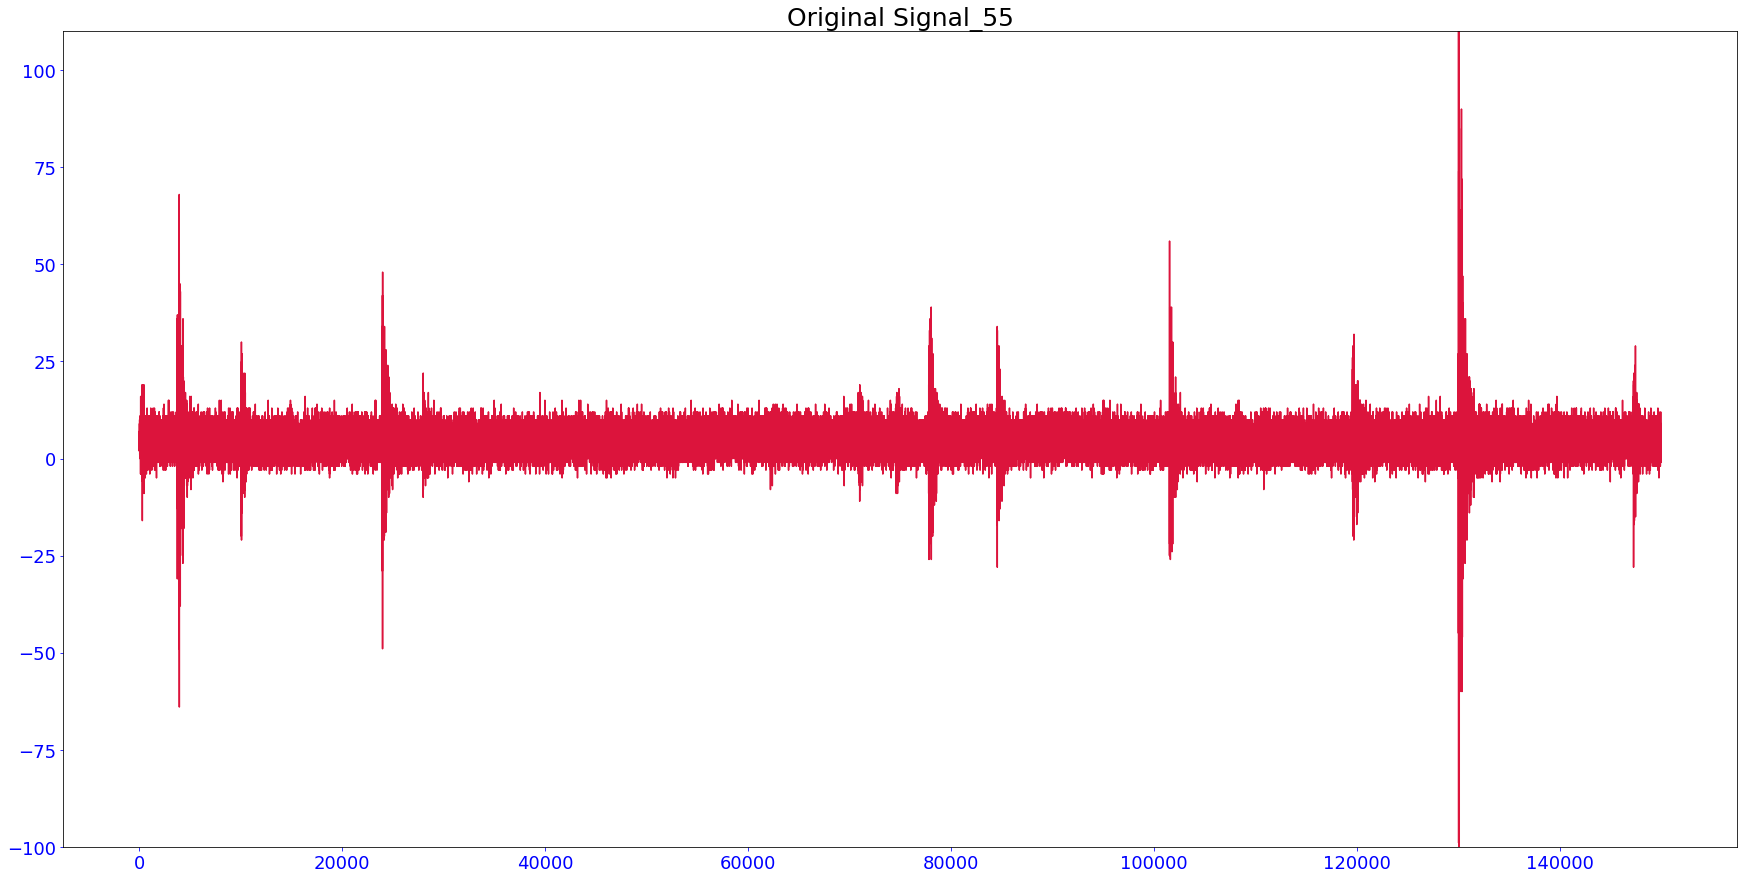

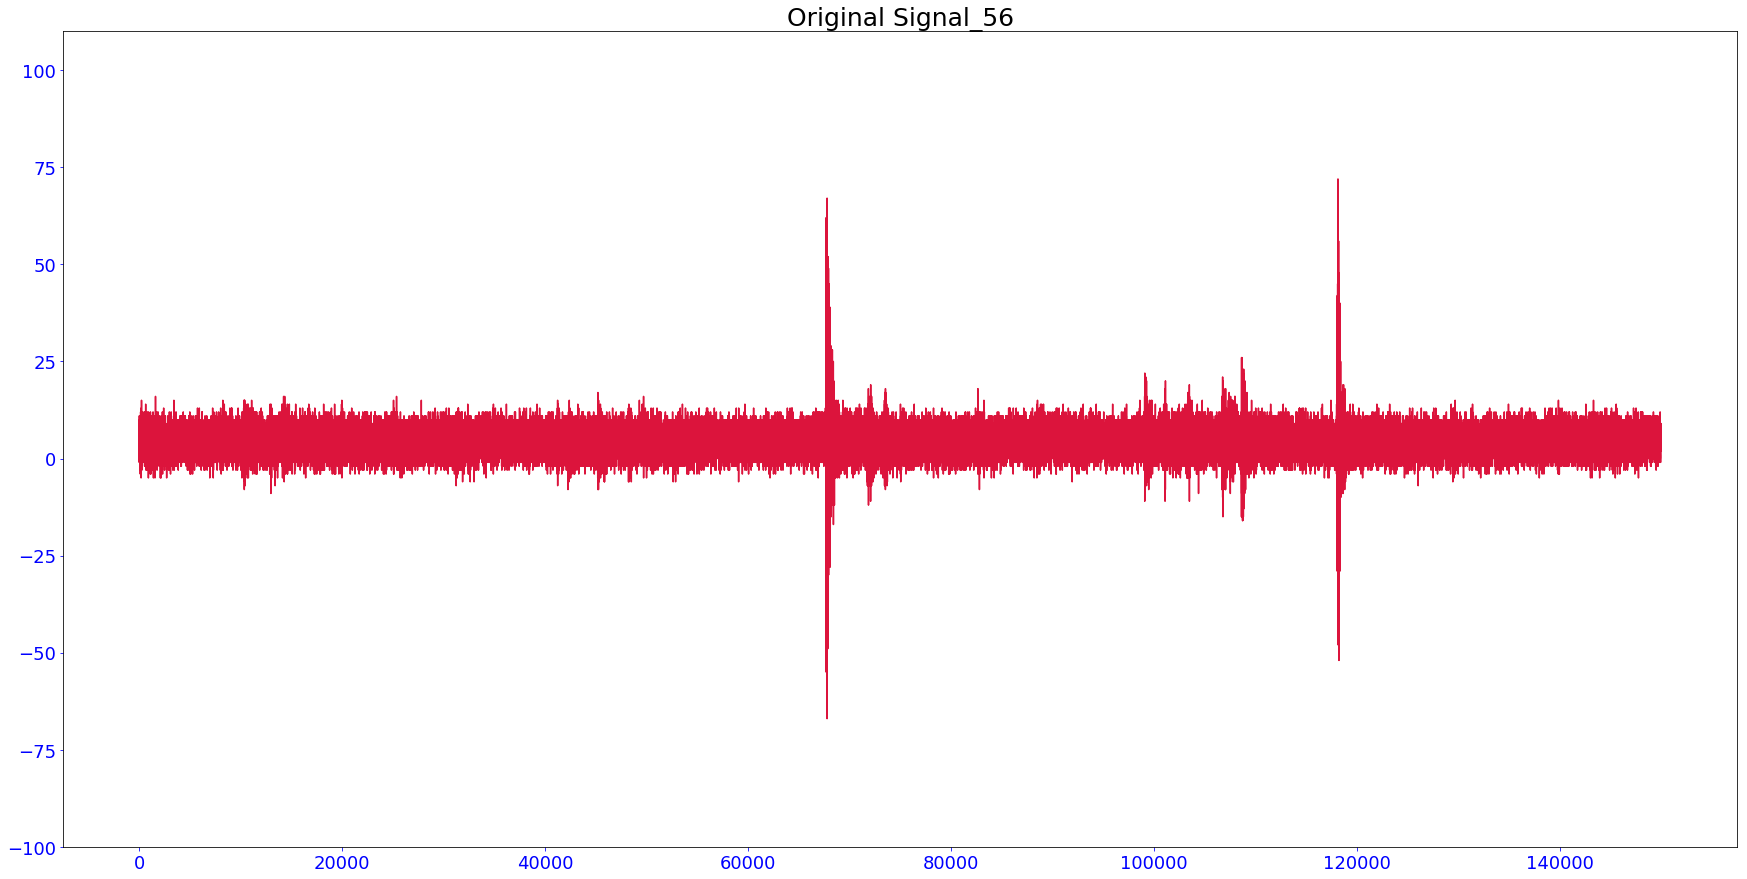

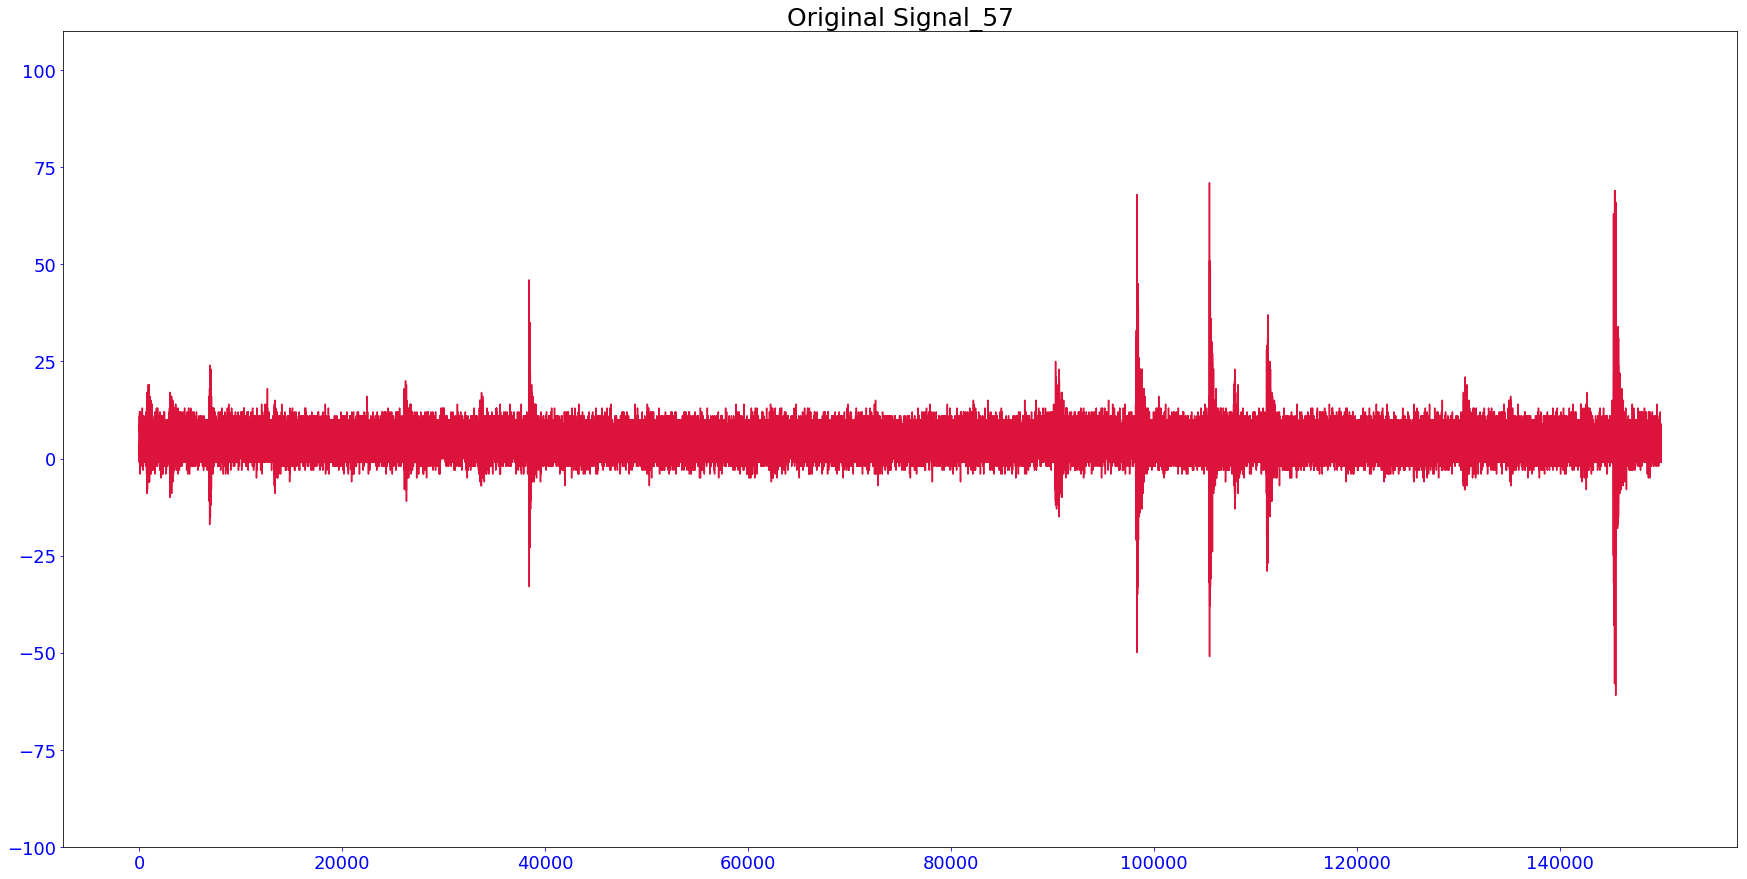

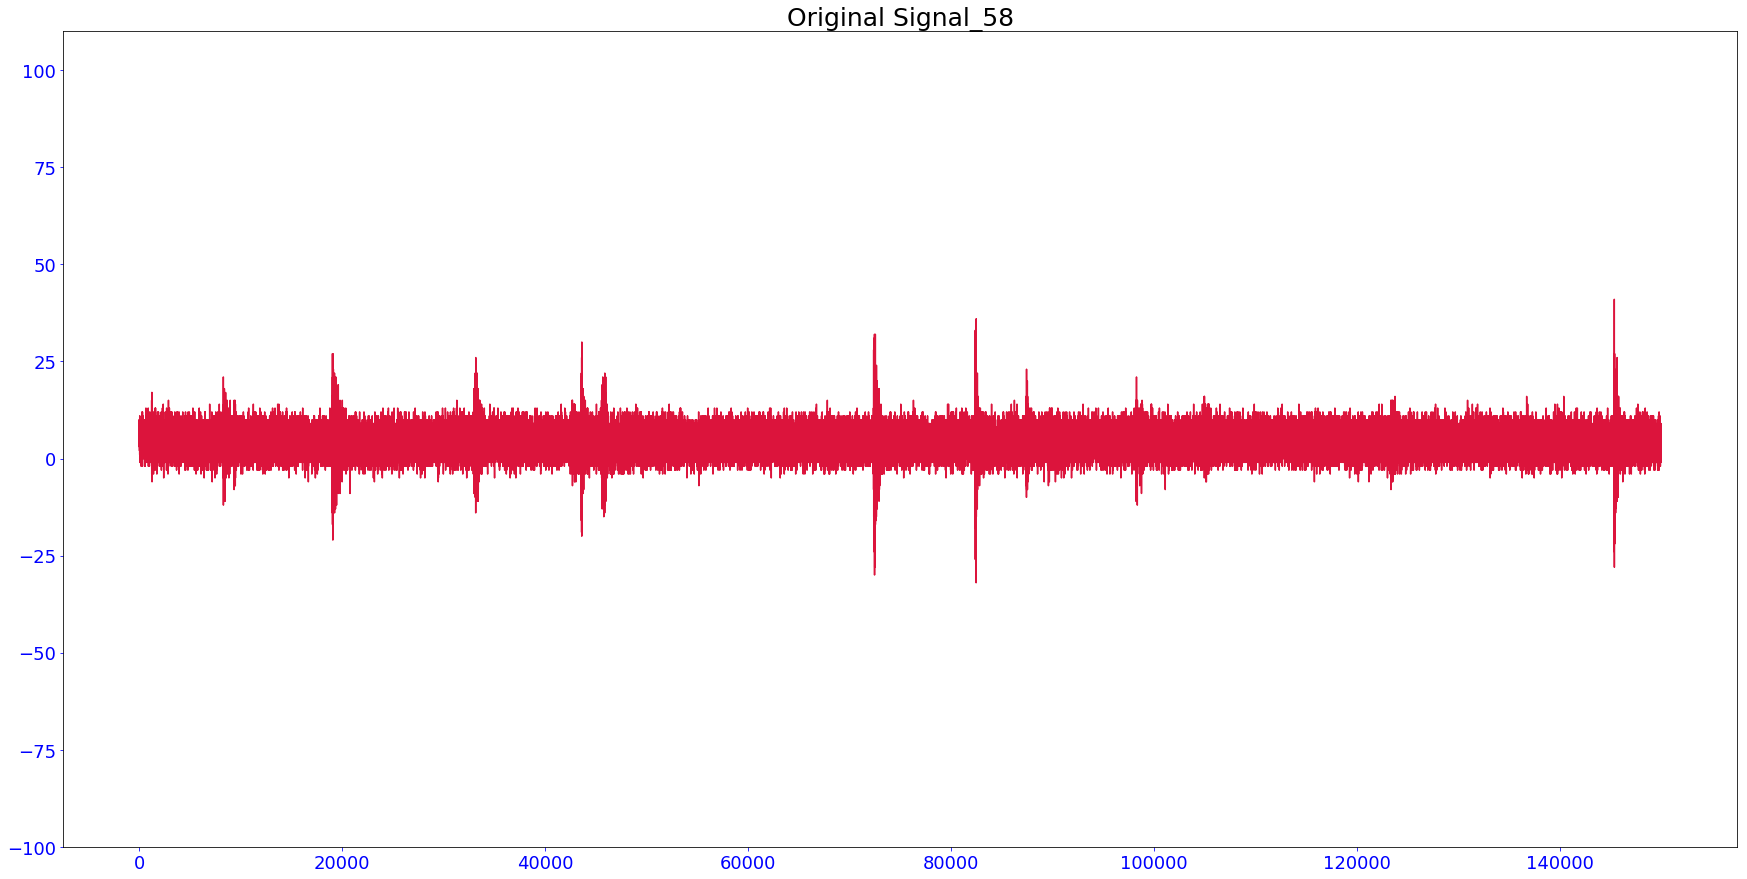

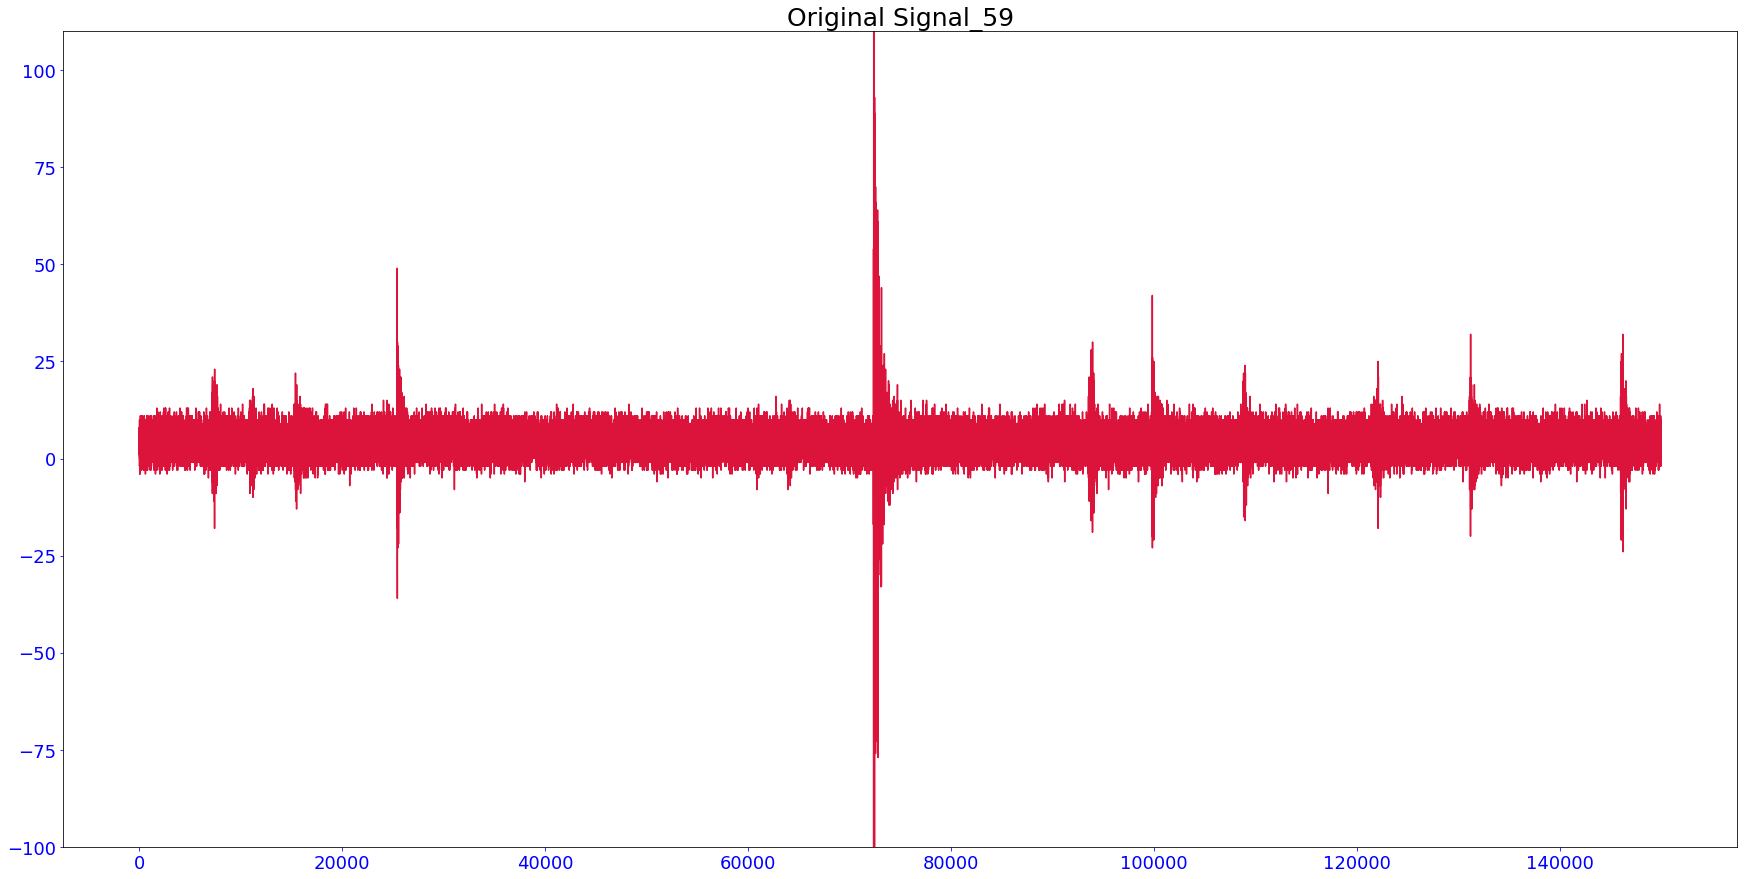

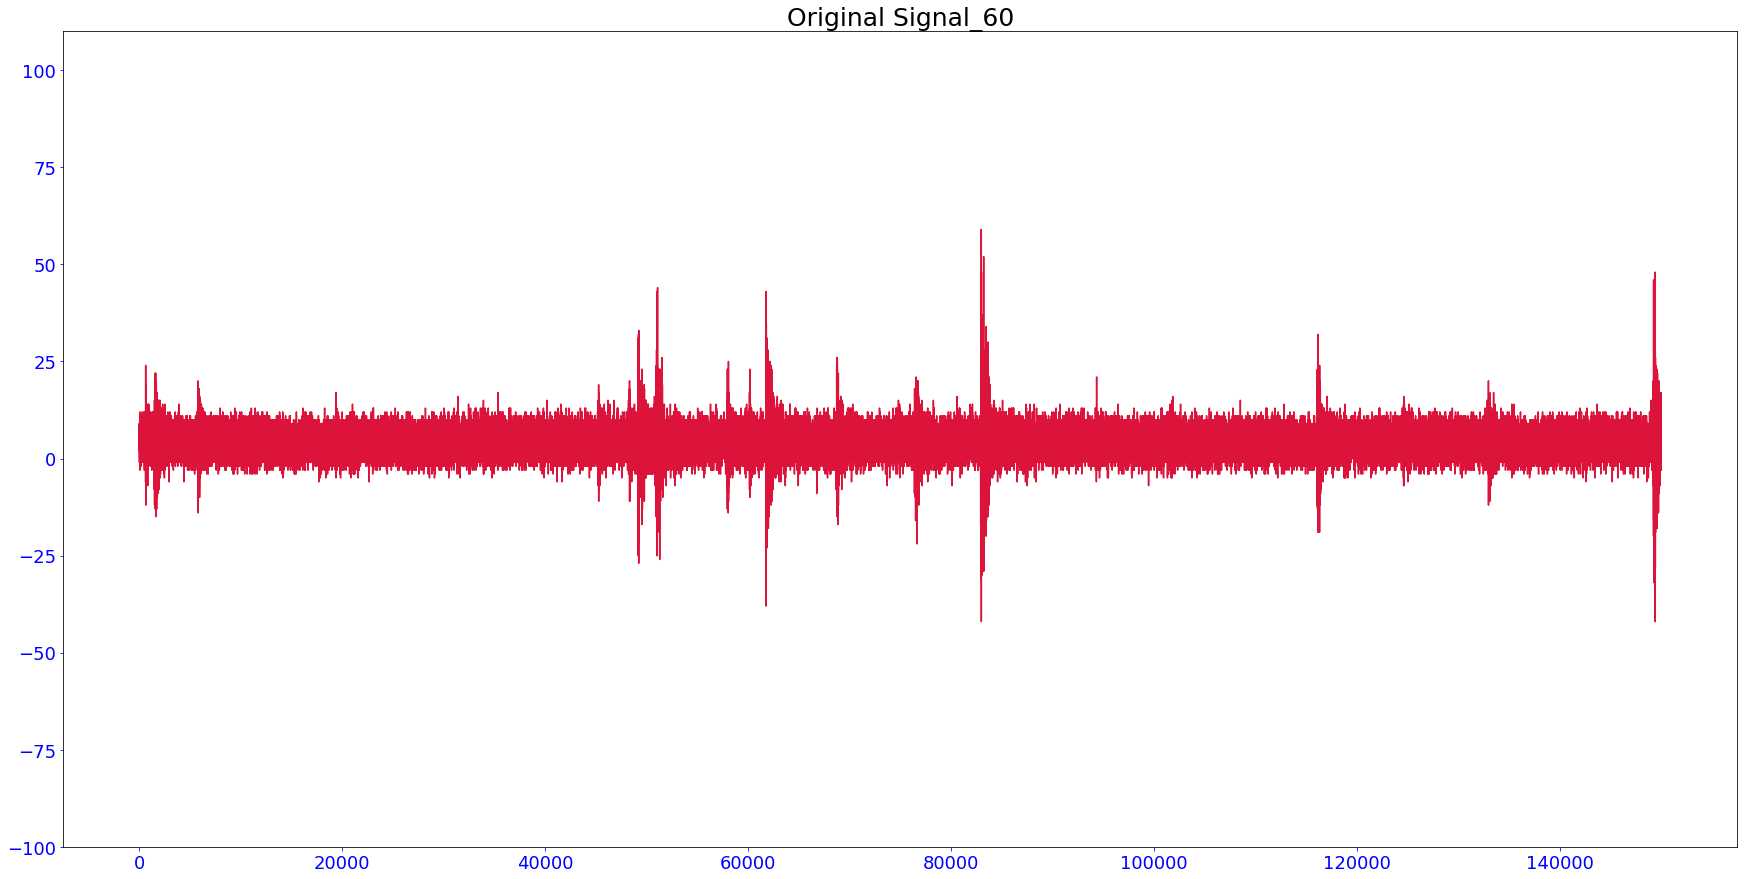

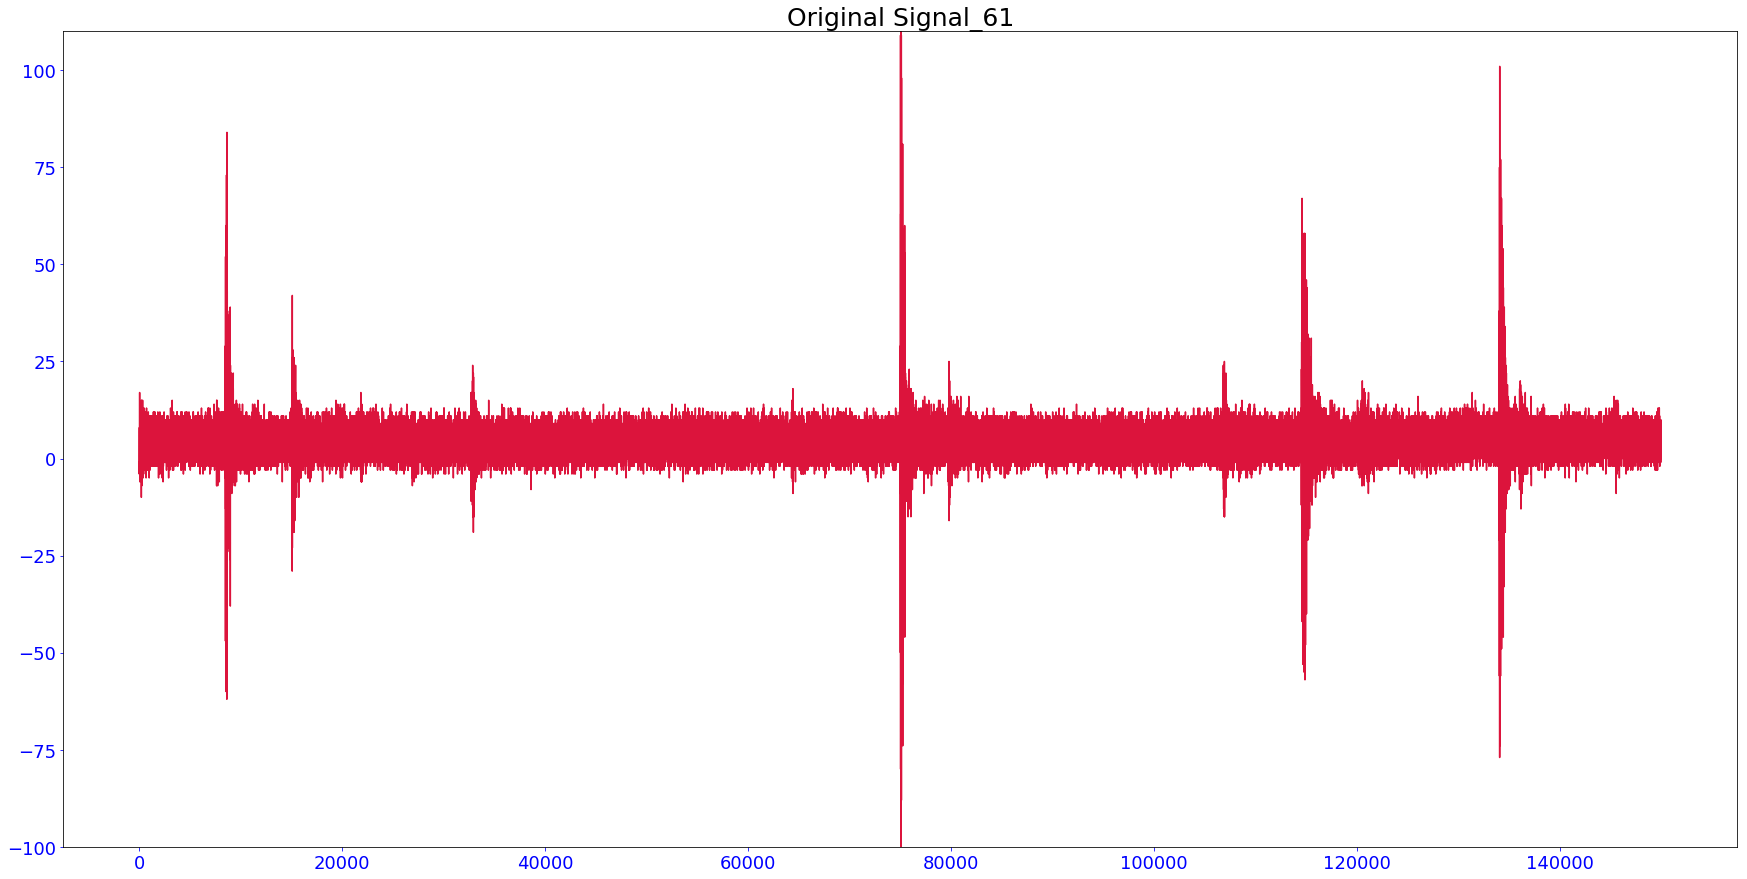

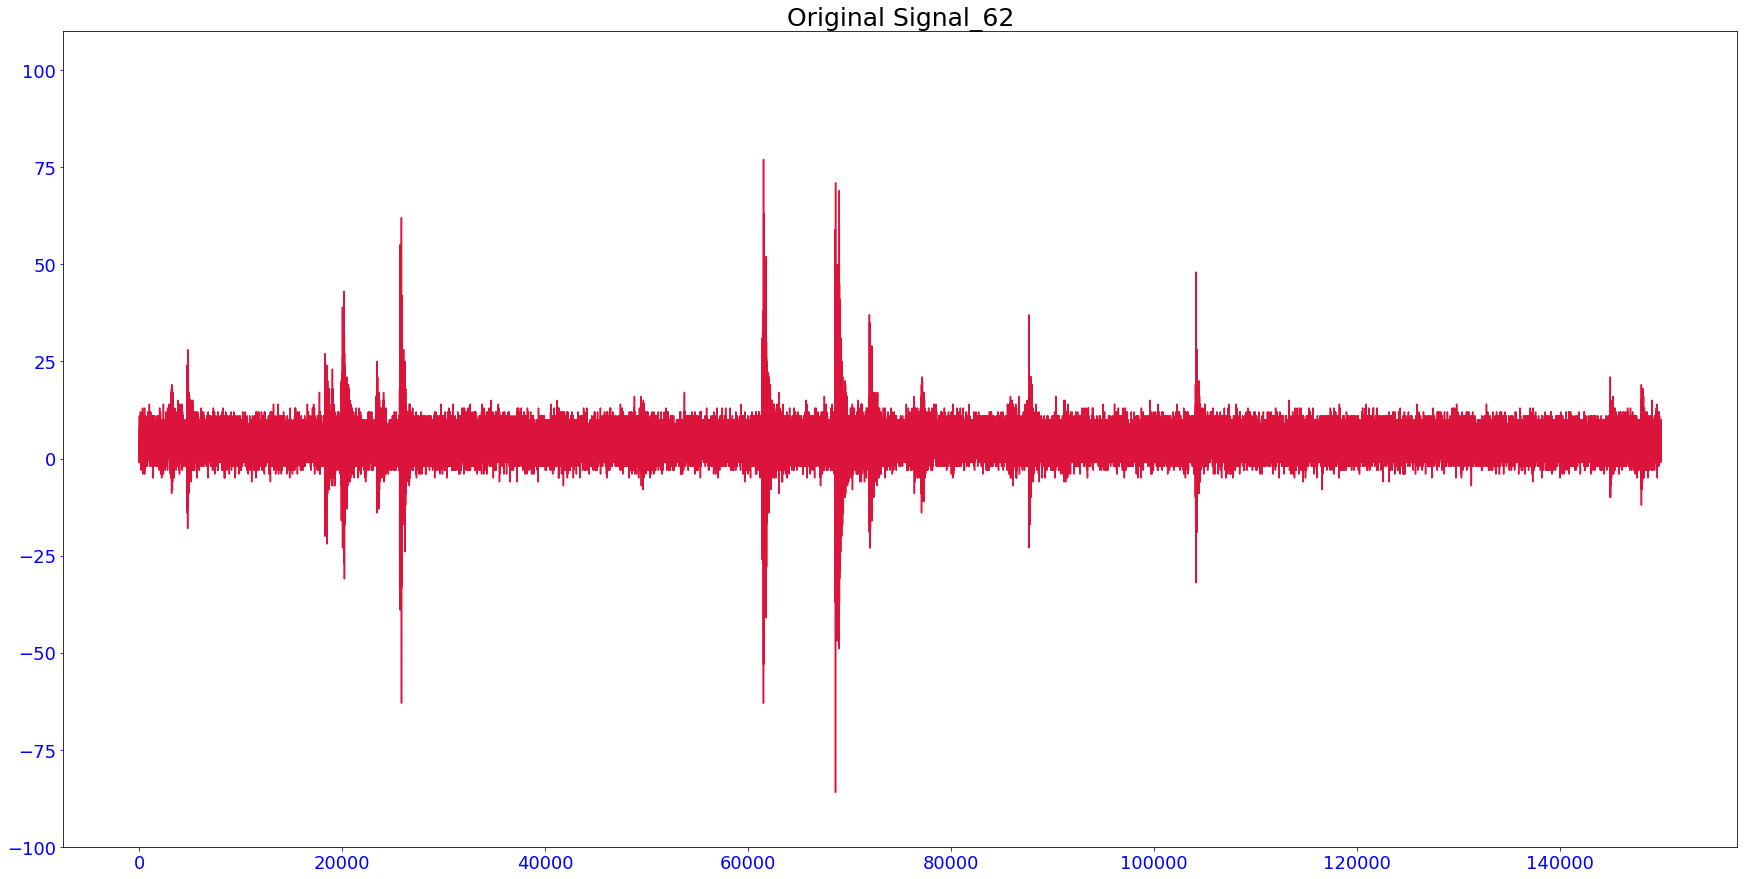

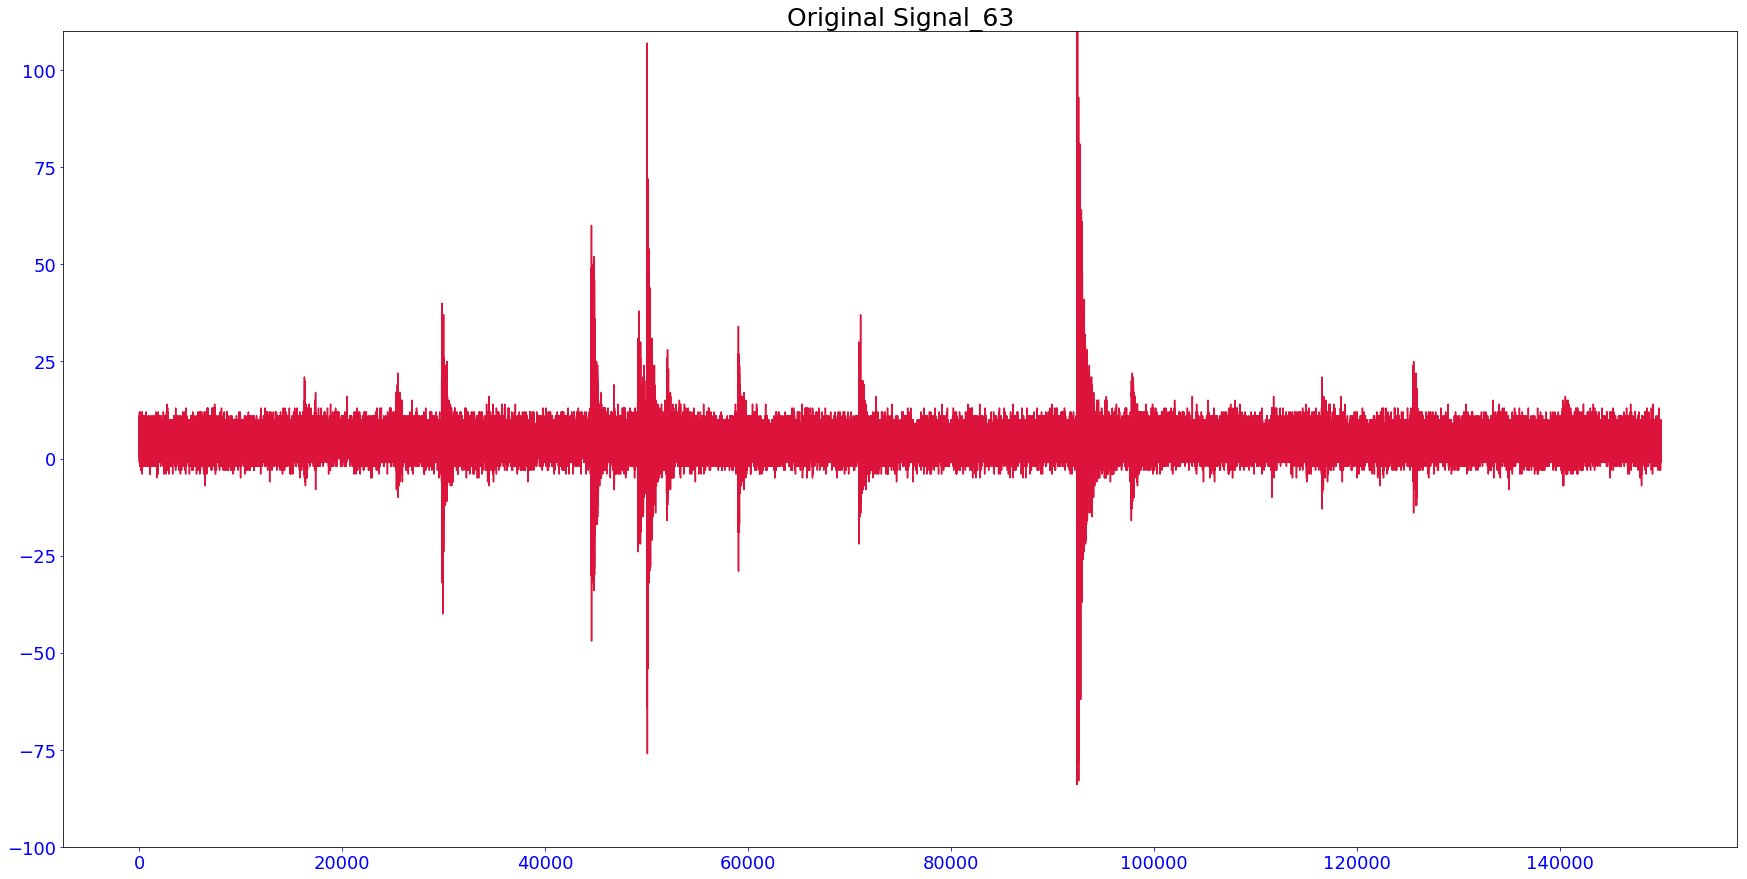

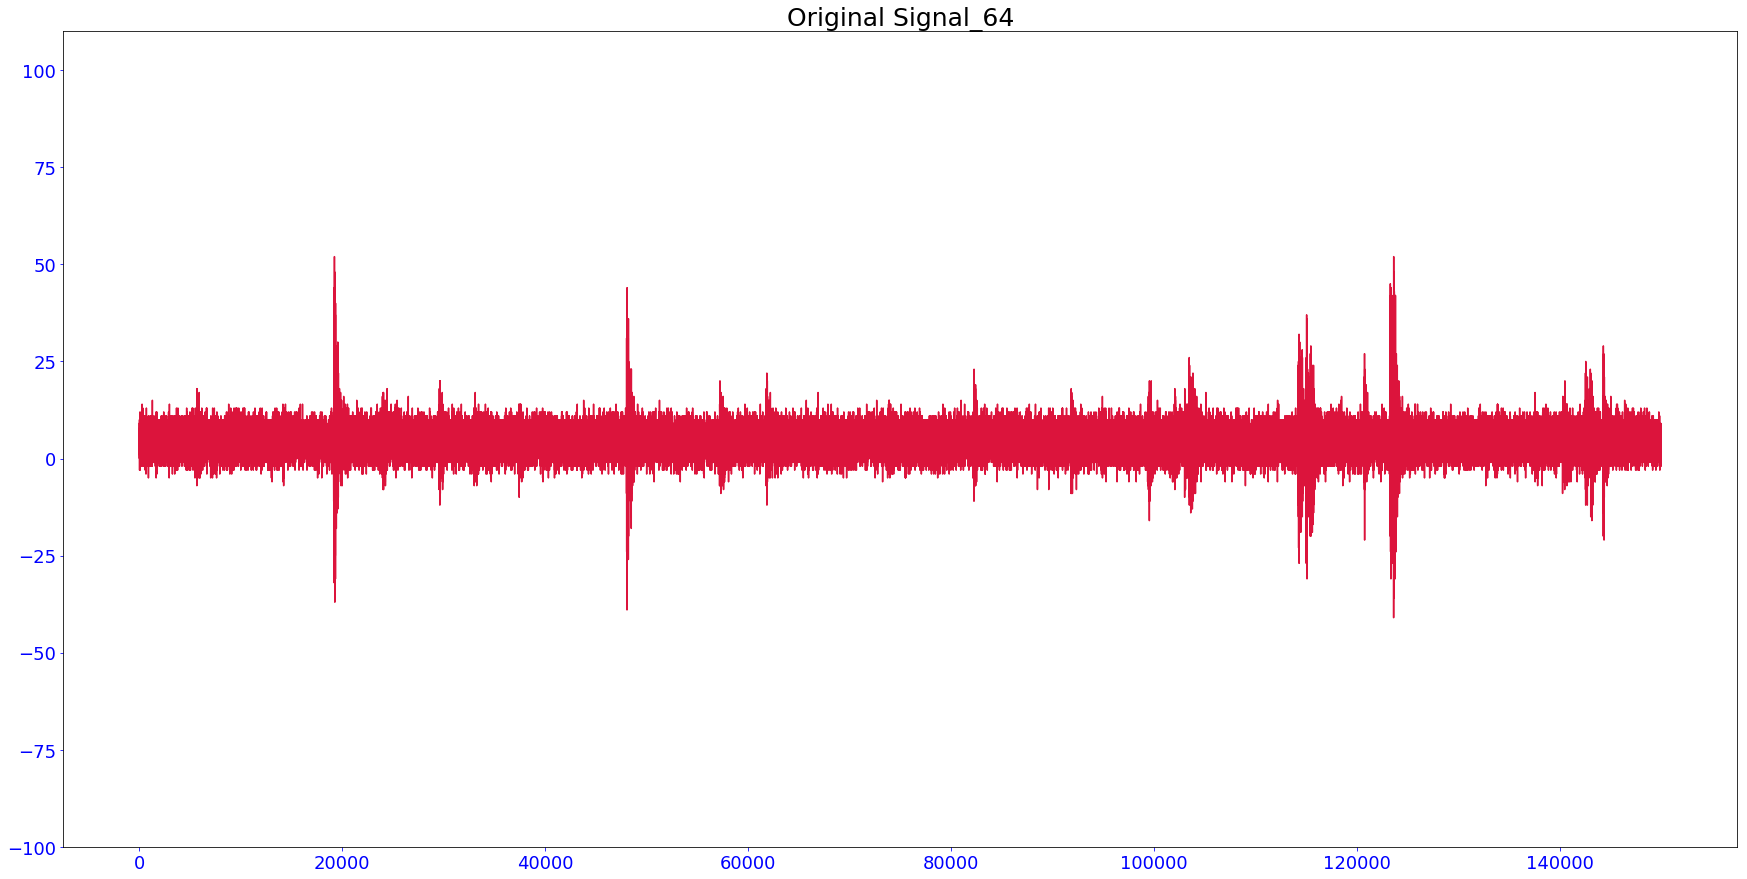

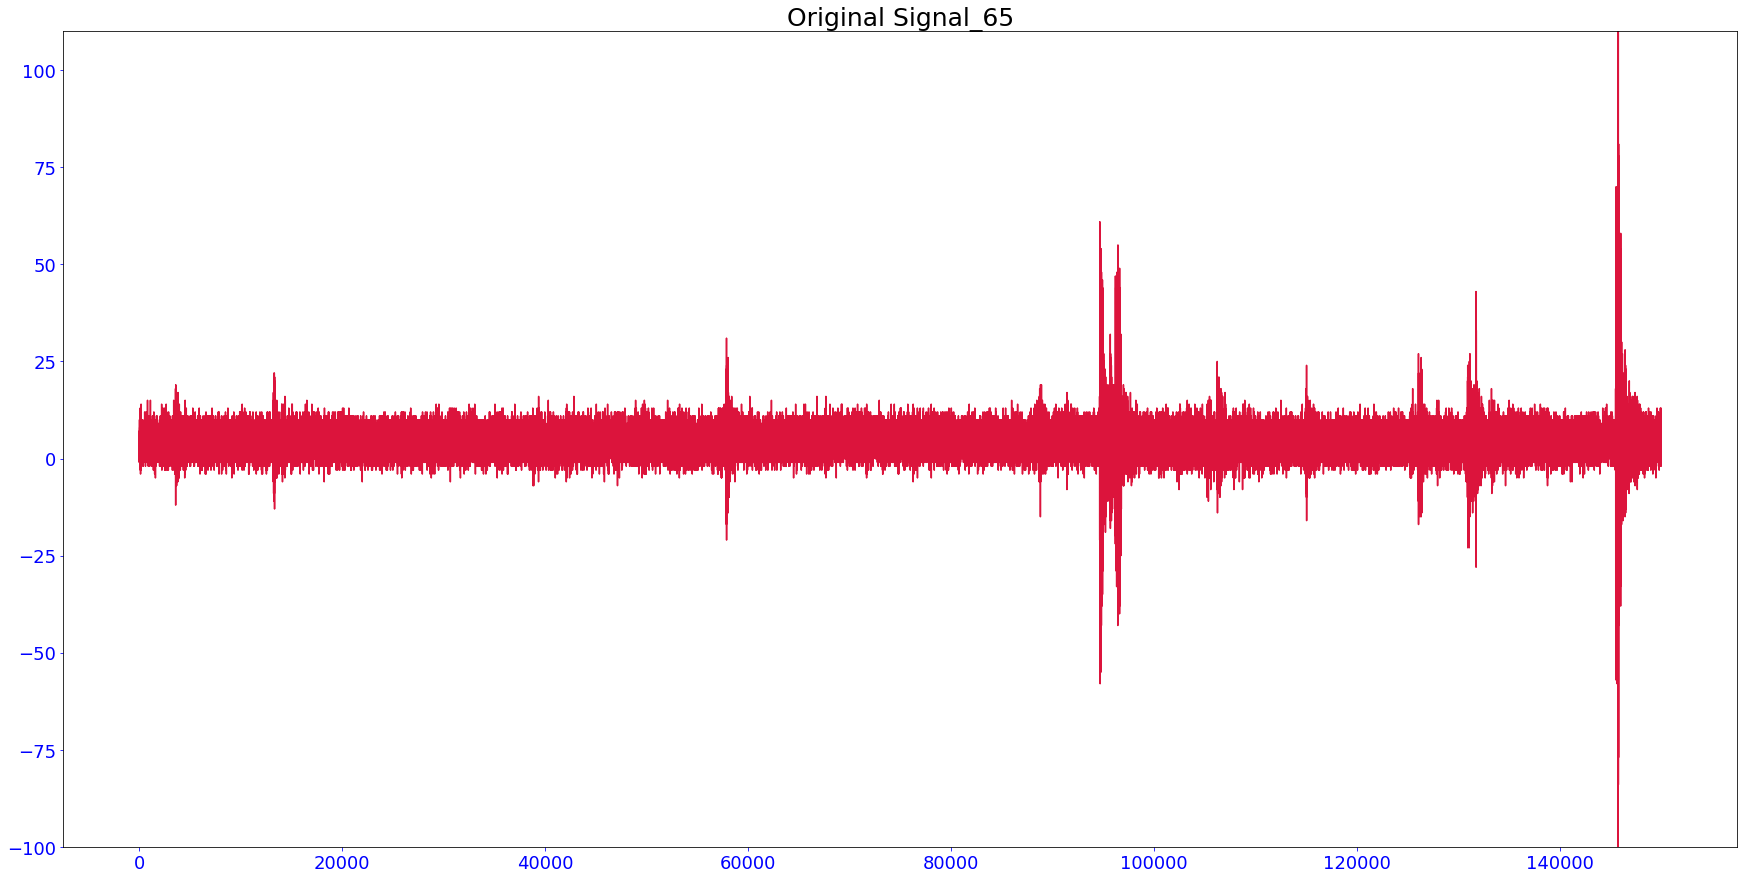

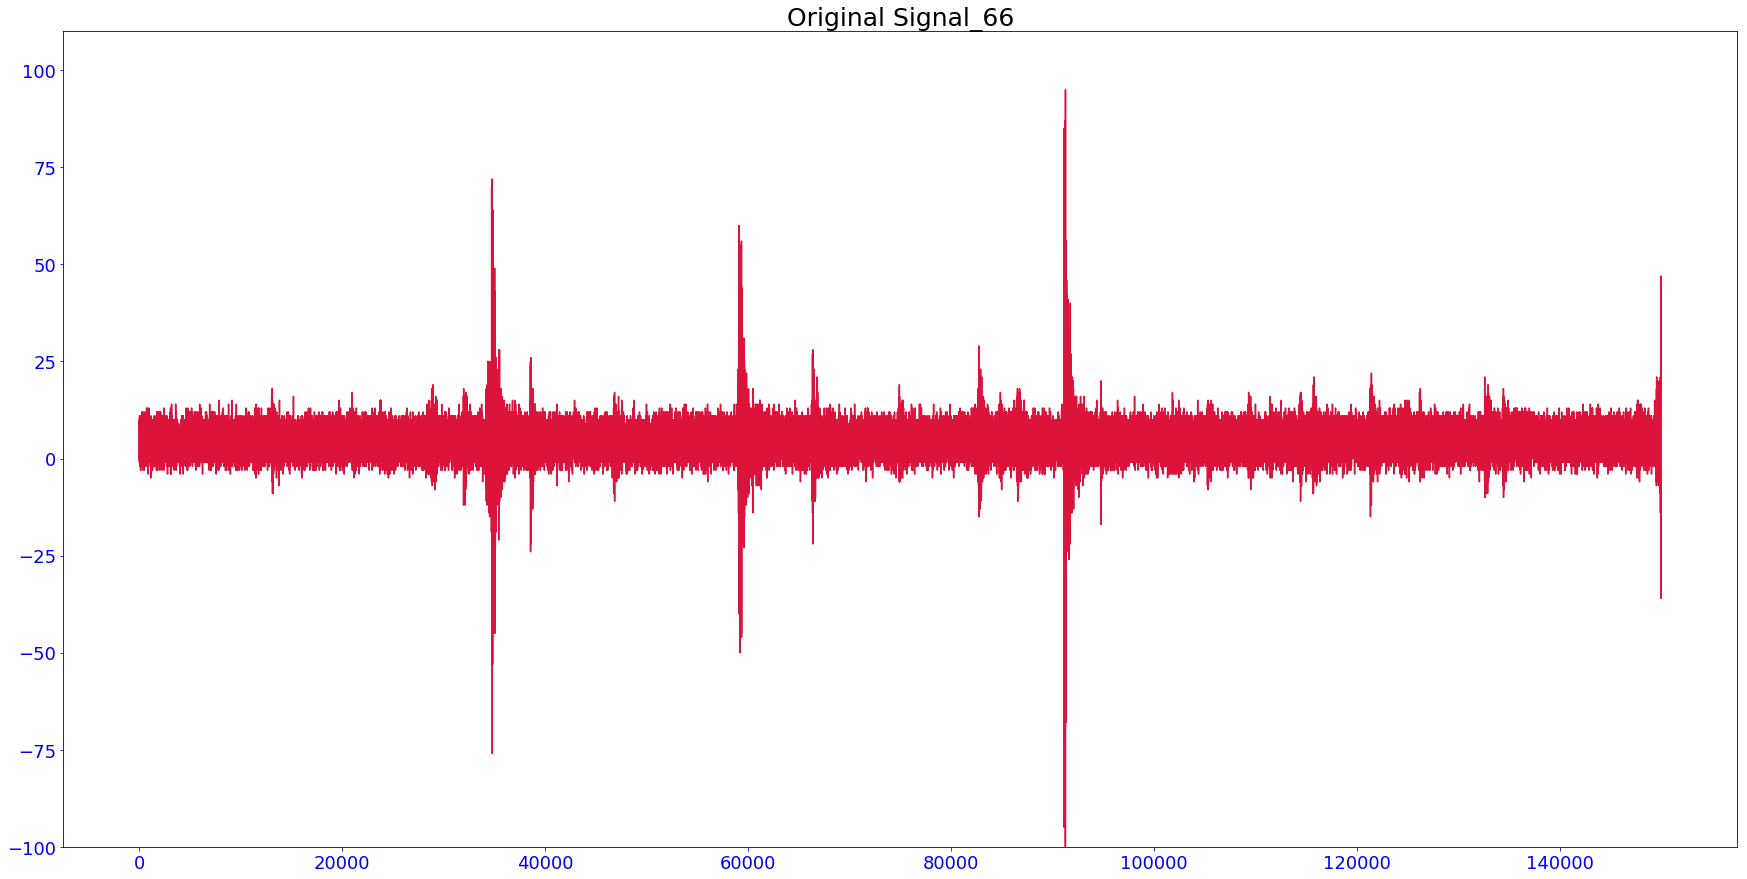

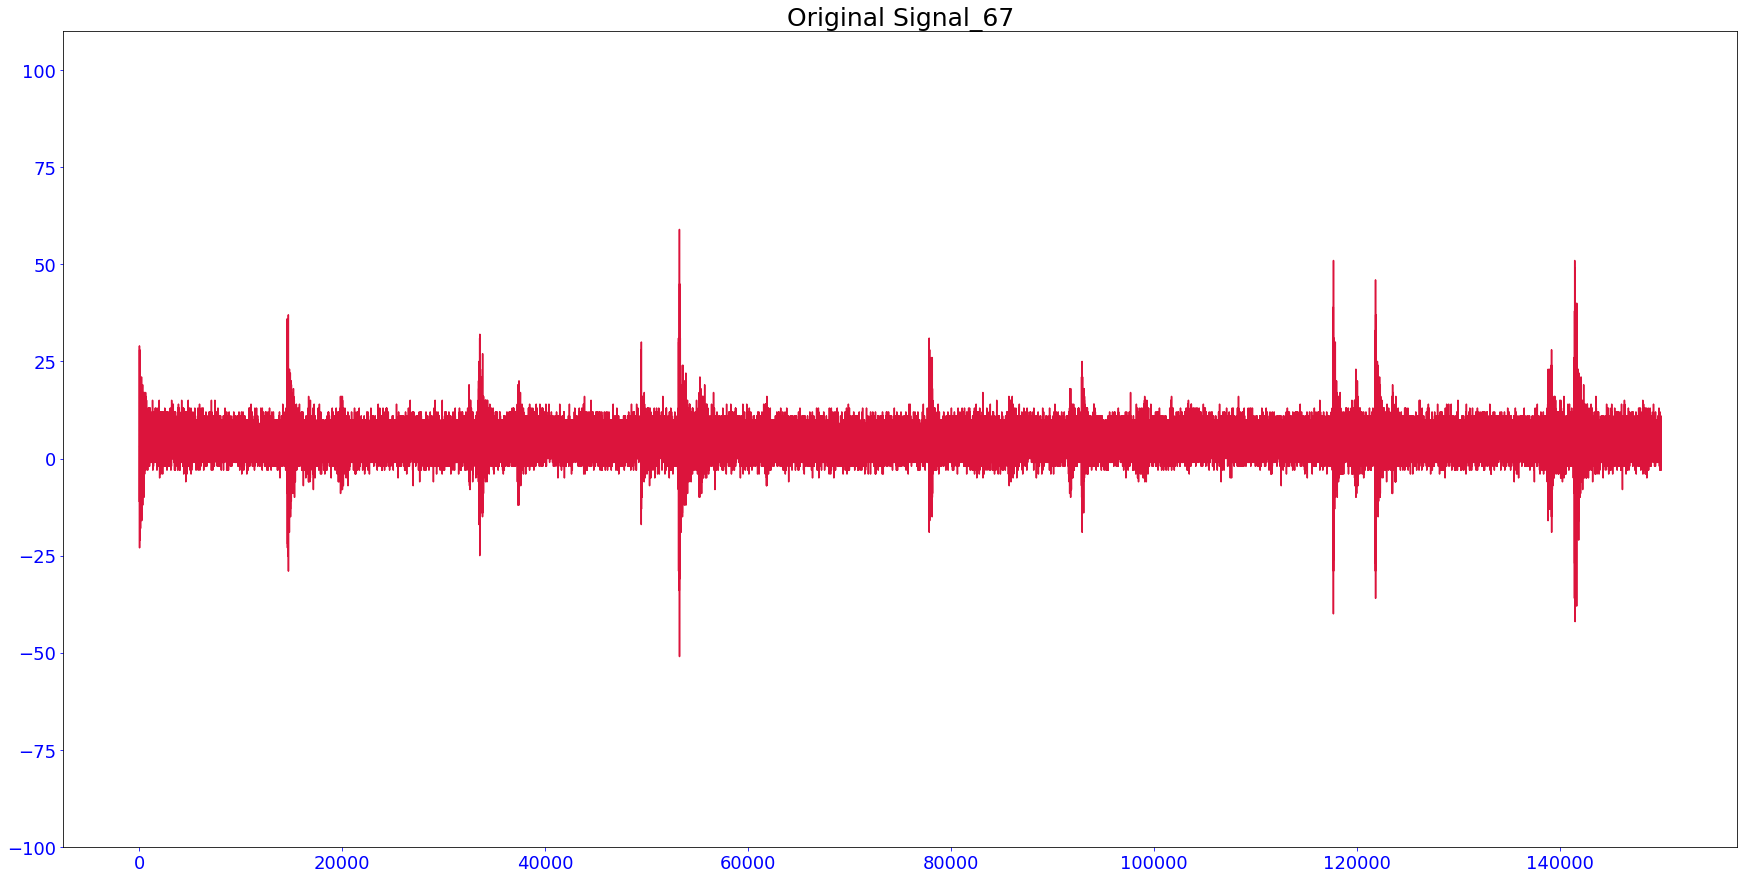

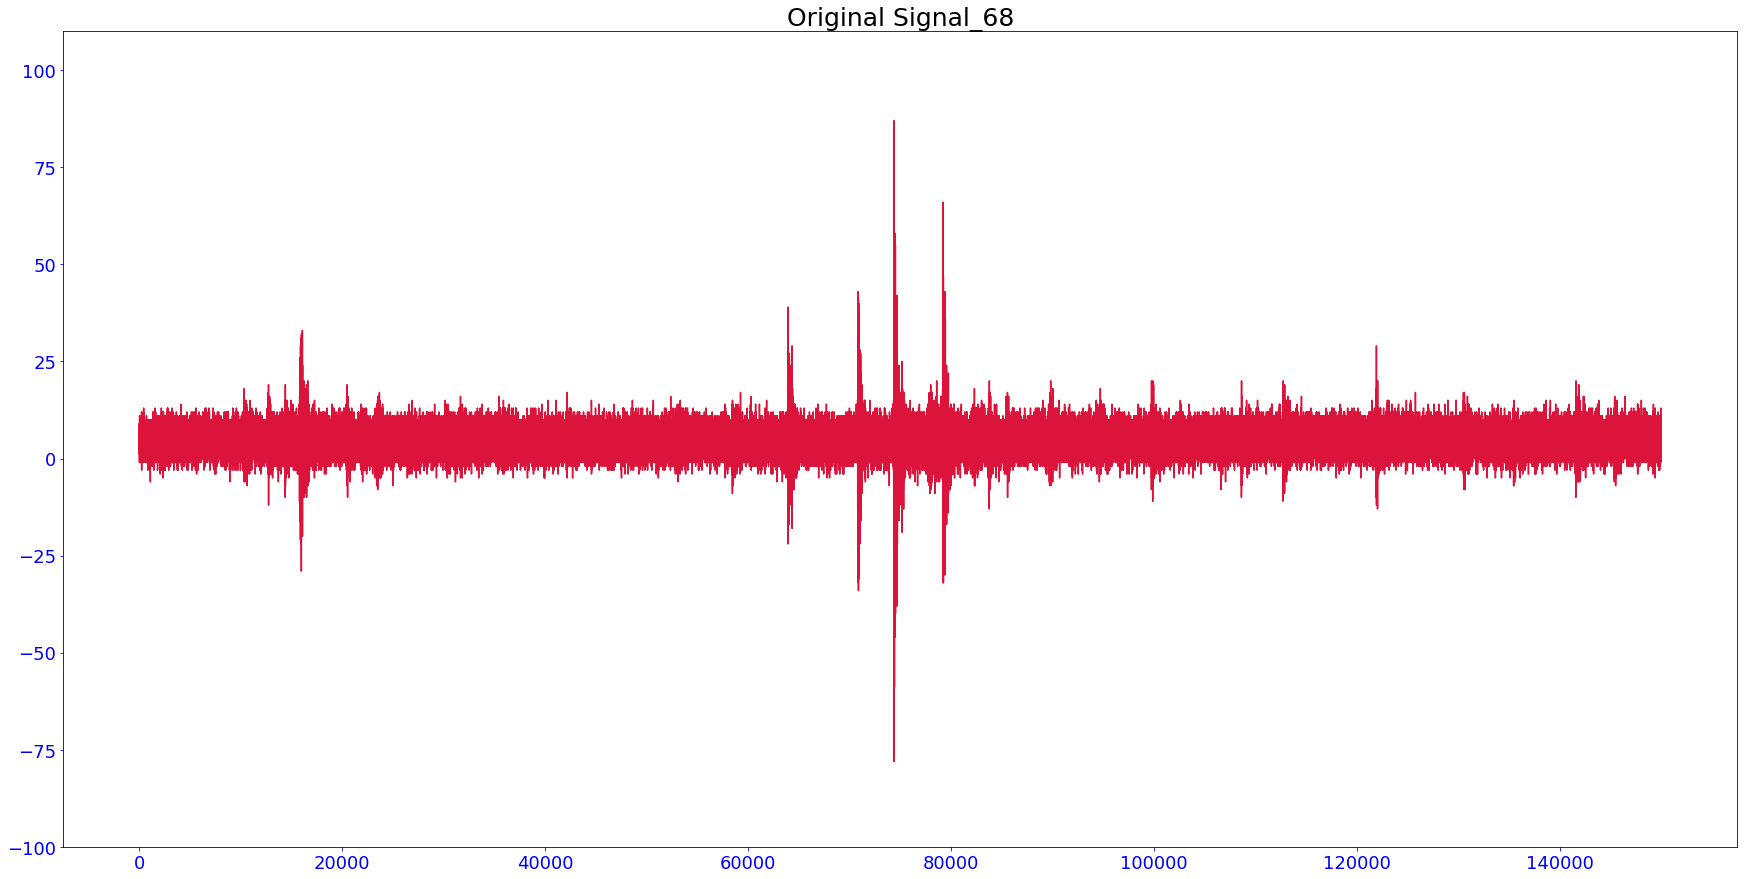

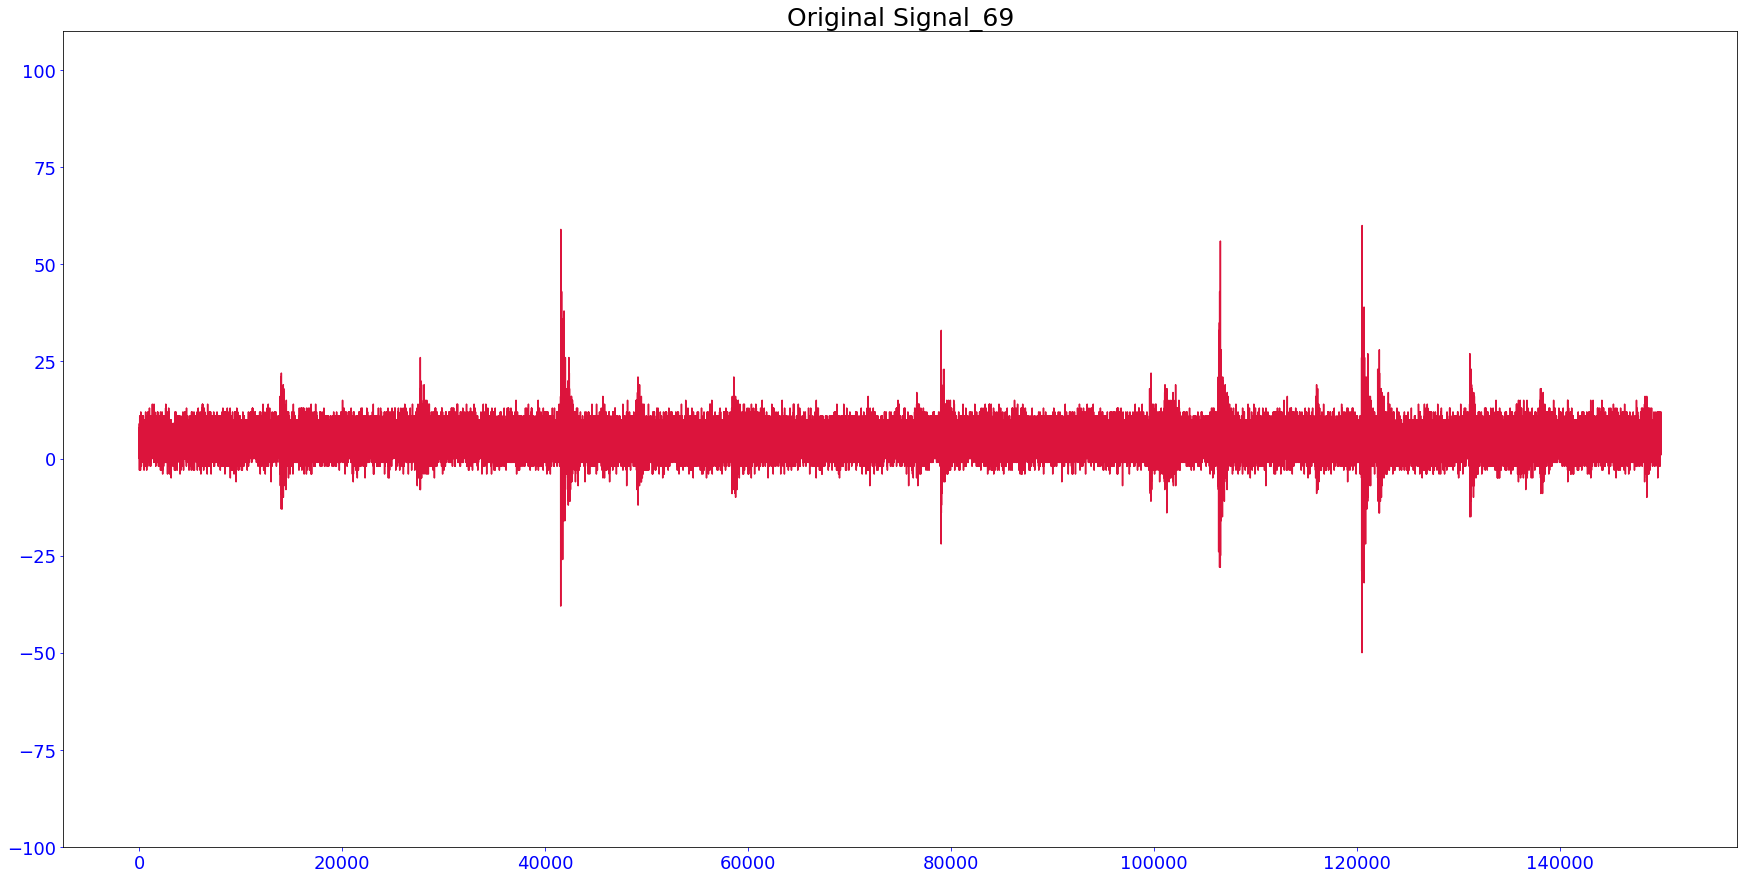

In [32]:
ll = [198,211,317,501,531,668,675,687,874,876,1094,1180,1238,1439,1582,1612,1824,2239,2245,2677,3009,3067,3068
    ,3273,3277,3281,3725,3756,3812,3857,4060,4079,4080]

lb = [29,325,689,916,1242,1449,1630,2044,2247,2494,2787,3070,3297,3517,3895,4138]

tb = ['26a2a0','724df9','7848f8','7a9f2b','7fa6ec','aa98cc','b35174','c80857','e3d751']

tl = ['004314','0e3d44','2f86cd','39ad50','3e87b4','4c12b2','4e3bd7','4eb127','5c57a8','82456a','87e4e8',
      '8be76c','8dfd7a','90b174','a1a511','a9089b','b686e5','bfdd14','c9831a','fdd50e','fdff11'] 
noearth = [110,111,112,113,114]
gt = ['193404']#'3d2013',5c57a8,
for ind,i in enumerate(range(29,70)):
    fig, ax = plt.subplots(figsize=(30, 15))

    ax.plot(signals[i], 'crimson')    #seg_gen['seg_' + i]  signals[i]
    ax.set_title('Original Signal_' + str(i), fontsize=25)
    ax.set_ylim(-100,110)
    ax.tick_params('y', colors='b', labelsize=18)
    ax.tick_params('x', colors='b', labelsize=18)

    plt.show()

In [8]:
sub = pd.read_csv('E:\kaggle\kaggle-Lanl_Earthquake_Prediction\GBDT/blending_xgb_lgbm-feat-aug_GPI_1.375.csv')

In [9]:
sub.head(5)

,seg_id,time_to_failure
0,seg_00030f,3.226788
1,seg_0012b5,4.393012
2,seg_00184e,5.888693
3,seg_003339,9.582105
4,seg_0042cc,7.020116


In [28]:
sub= sub[sub['time_to_failure']>11]

In [29]:
sub

,seg_id,time_to_failure
1630,seg_a35e7c,11.258891


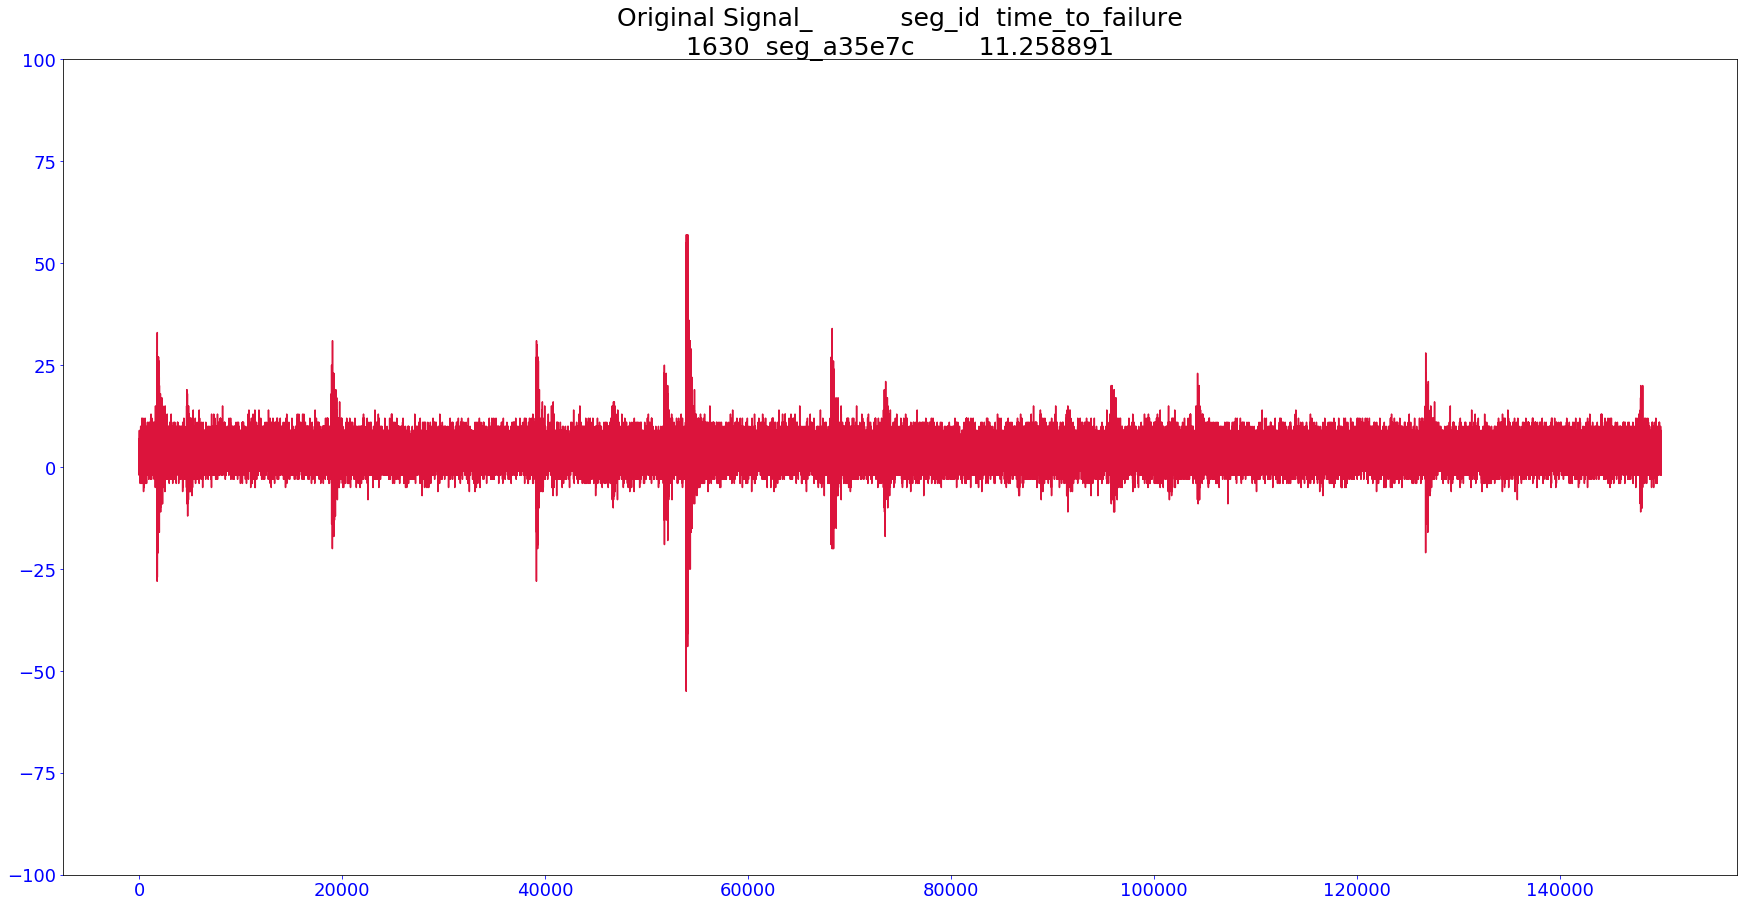

In [30]:
for ind,i in enumerate(list(sub['seg_id'])):
    fig, ax = plt.subplots(figsize=(30, 15))

    ax.plot(seg_gen[i], 'crimson')    #seg_gen['seg_' + i]  signals[i]
    ax.set_title('Original Signal_' + ' ' + str(sub[sub['seg_id'] == i]), fontsize=25)
    ax.set_ylim(-100,100)
    ax.tick_params('y', colors='b', labelsize=18)
    ax.tick_params('x', colors='b', labelsize=18)

    plt.show()